***
### CAPSTONE PROJECT 3: FEATURE ENGINEERING/PRE-PROCESSING/MODELING ###
***
- Review the PCA's generated from the DATA CLEANING/EDA 
- Determine how many PCAs required
- Deterrmine if only most important Eigen values from PCAs would be sufficient to model.
- separate table into X and y sets.
- create Train and test data sets.
- setup ARIMA models
- setup LSTM Model
- setup VAR model.
- train models
- evaluate models.
- decide which model serves best and why.

In [382]:
# Basic Data Science Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models to test and scalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
#   LSTM
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# VARMAX
from statsmodels.tsa.statespace.varmax import VARMAX

# Model Metrics
from sklearn.metrics import mean_squared_error


***
##### FEATURE ENGINEERING
***
Determine Number of PCA's Required or if only important Eigen values from PCAs would be sufficient for our model

In [383]:
# Linux
bitcoin_df = pd.read_csv('./Data/bitcoin_df_cleaned')
most_important_features = pd.read_csv('./Data/most_important_features')

# Windows
# bitcoin_df = pd.read_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\bitcoin_df_cleaned')
# most_important_features = pd.read_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\most_important_features')

In [384]:
bitcoin_df.head()

,date,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,2009-01-03,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
1,2009-01-04,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
2,2009-01-05,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
3,2009-01-06,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
4,2009-01-07,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025


In [385]:
bitcoin_df.columns

Index(['date', 'USD Exchange Trade Volume', 'Total Transaction Fees USD',
       'Total Transaction Fees', 'Total Output Volume', 'Total Bitcoins',
       'Transaction Excluding Popular Addresses',
       'Number of Transactions per Block', 'Total Number of Transactions',
       'Number of Transactions', 'Number of Unique Addresses Used',
       'My Wallet Transaction Volume', 'My Wallet Number of Users',
       'Number of Transactions per Day', 'Market Capitalization',
       'Market Price', 'Miners Revenue', 'Hash Rate',
       'Estimated Transaction Volume USD', 'Estimated Transaction Volume',
       'Difficulty', 'Cost Percent of Transaction Volume',
       'Cost per Transaction', 'API Blockchain Size', 'Average Block Size',
       'Median Transaction Confirmation Time', 'PCA1', 'PCA2', 'PCA3', 'PCA4',
       'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12'],
      dtype='object')

In [386]:
print(most_important_features['Feature Name'])

0                             Difficulty
1                  Market Capitalization
2       Estimated Transaction Volume USD
3              USD Exchange Trade Volume
4           Total Number of Transactions
5                              Hash Rate
6              My Wallet Number of Users
7                         Miners Revenue
8              My Wallet Number of Users
9                    Total Output Volume
10            Total Transaction Fees USD
11    Cost Percent of Transaction Volume
Name: Feature Name, dtype: object


Since we're dealing with Cybercurrency rather than stocks, we should resample this data taking the final value per month and also start performing percentchanges per column and autocorrelation functions as we curate a final feature set with which to model.

In [387]:
bitcoin_df.head()

,date,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,2009-01-03,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
1,2009-01-04,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
2,2009-01-05,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
3,2009-01-06,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
4,2009-01-07,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025


In [388]:
# Linux Machine
# bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
# bitcoin_df.set_index('date', inplace=True)
# monthly_bitcoin_df = bitcoin_df.resample(rule='ME').last()

# Windows Machine
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
bitcoin_df.set_index('date', inplace=True)
monthly_bitcoin_df = bitcoin_df.resample(rule='M').last()

In [389]:
monthly_bitcoin_df.head()

,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,Number of Unique Addresses Used,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
date,,,,,,,,,,,,,,,,,,,,,
2009-01-31,0.0,0.0,0.0,6900.0,131350.0,118.0,1.0000,2660.0,118.0,118.0,...,0.565633,-0.624664,-0.082270,0.002458,0.245686,0.332645,-0.596459,0.024101,0.338810,-0.197246
2009-02-28,0.0,0.0,0.0,5650.0,300350.0,107.0,1.0101,5894.0,100.0,107.0,...,0.560841,-0.624533,-0.080818,-0.003430,0.245534,0.330761,-0.590856,0.024245,0.331745,-0.193094
2009-03-31,0.0,0.0,0.0,7100.0,473700.0,111.0,1.0000,9564.0,107.0,107.0,...,0.555870,-0.622593,-0.083748,-0.008178,0.244914,0.328785,-0.585899,0.024475,0.324328,-0.188681
2009-04-30,0.0,0.0,0.0,6550.0,646200.0,131.0,1.0000,13031.0,123.0,123.0,...,0.550927,-0.620732,-0.084030,-0.011903,0.243679,0.325225,-0.581295,0.024595,0.316735,-0.184322
2009-05-31,0.0,0.0,0.0,3700.0,814050.0,74.0,1.0000,16407.0,74.0,97.0,...,1.504016,-3.840696,64.677784,0.338447,-3.467730,-0.868214,1.005480,-0.029261,-0.245632,0.111518


In [390]:
most_important_features_list = list(most_important_features['Feature Name'].unique())

In [391]:
def feature_correlation(df, feature_list):
    pct_change_df = pd.DataFrame()
    for feature in feature_list:
       pct_change_df[f'{feature}_RET']  = df[feature].pct_change()
       
    corr = pct_change_df.corr()
    sns.heatmap(corr)

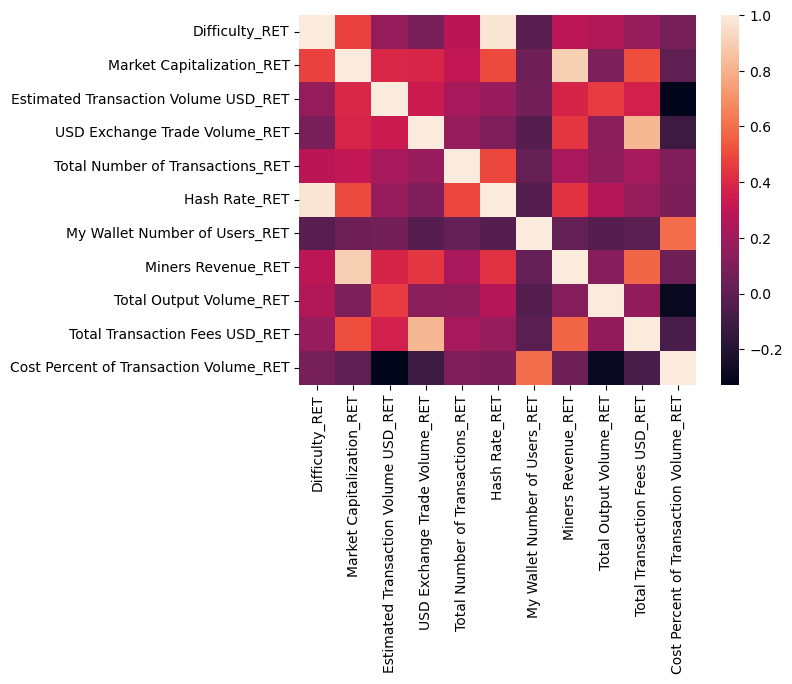

In [392]:
_ = feature_correlation(monthly_bitcoin_df, most_important_features_list)

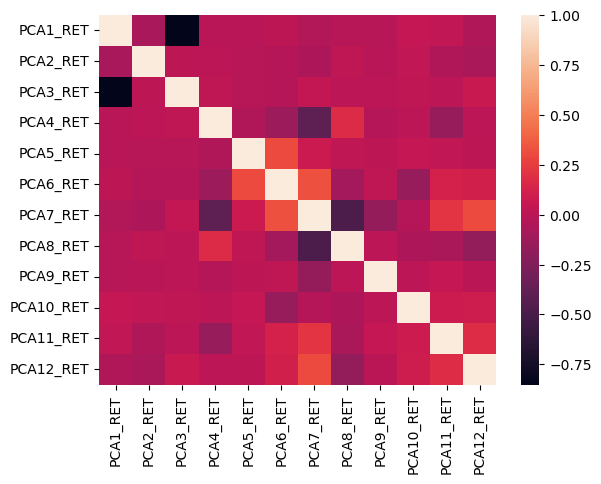

In [393]:
PCA_list = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12']
pct_change_df = feature_correlation(monthly_bitcoin_df, PCA_list)

These heatmaps pretty clearly say that for our feature set, we should use our curated PCAs rather then the primary Eigen values particularly since their degree of correlation is almost all zero which means little to no correlation between these PC vectors.  which for a multivariate time series analysis is exactly what we want.  NO CONFOUNDING VARIABLES!

In [394]:
monthly_pca_bitcoin_df = monthly_bitcoin_df[PCA_list]
monthly_pca_bitcoin_df['Market Price'] = monthly_bitcoin_df.loc[:,'Market Price']

C:\Users\micha\AppData\Local\Temp\ipykernel_59924\203295870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df['Market Price'] = monthly_bitcoin_df.loc[:,'Market Price']


In [395]:
monthly_pca_bitcoin_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Market Price
date,,,,,,,,,,,,,
2009-01-31,-4.311894,-1.941027,0.565633,-0.624664,-0.082270,0.002458,0.245686,0.332645,-0.596459,0.024101,0.338810,-0.197246,0.0
2009-02-28,-4.305432,-1.935971,0.560841,-0.624533,-0.080818,-0.003430,0.245534,0.330761,-0.590856,0.024245,0.331745,-0.193094,0.0
2009-03-31,-4.298641,-1.929858,0.555870,-0.622593,-0.083748,-0.008178,0.244914,0.328785,-0.585899,0.024475,0.324328,-0.188681,0.0
2009-04-30,-4.291903,-1.923502,0.550927,-0.620732,-0.084030,-0.011903,0.243679,0.325225,-0.581295,0.024595,0.316735,-0.184322,0.0
2009-05-31,-4.724830,-3.294112,1.504016,-3.840696,64.677784,0.338447,-3.467730,-0.868214,1.005480,-0.029261,-0.245632,0.111518,0.0


In [396]:
pct_change_df = pd.DataFrame()
for feature in PCA_list:
    pct_change_df[f'{feature}_RET']  = monthly_bitcoin_df[feature].pct_change()

In [397]:
for col in pct_change_df.columns:
    print(f'Autocorrelation for {col} is: {pct_change_df[col]}')

Autocorrelation for PCA1_RET is: date
2009-01-31         NaN
2009-02-28   -0.001499
2009-03-31   -0.001577
2009-04-30   -0.001567
2009-05-31    0.100871
                ...   
2023-12-31    0.454556
2024-01-31   -0.199415
2024-02-29    0.252745
2024-03-31   -0.158165
2024-04-30    0.118616
Freq: M, Name: PCA1_RET, Length: 184, dtype: float64
Autocorrelation for PCA2_RET is: date
2009-01-31         NaN
2009-02-28   -0.002604
2009-03-31   -0.003158
2009-04-30   -0.003294
2009-05-31    0.712560
                ...   
2023-12-31   -0.723025
2024-01-31    3.189300
2024-02-29    0.517368
2024-03-31    0.343781
2024-04-30   -0.157031
Freq: M, Name: PCA2_RET, Length: 184, dtype: float64
Autocorrelation for PCA3_RET is: date
2009-01-31         NaN
2009-02-28   -0.008472
2009-03-31   -0.008864
2009-04-30   -0.008892
2009-05-31    1.729972
                ...   
2023-12-31   -4.201994
2024-01-31   -1.110915
2024-02-29   -9.887594
2024-03-31   -1.083249
2024-04-30   -3.216972
Freq: M, Name: PCA3_R

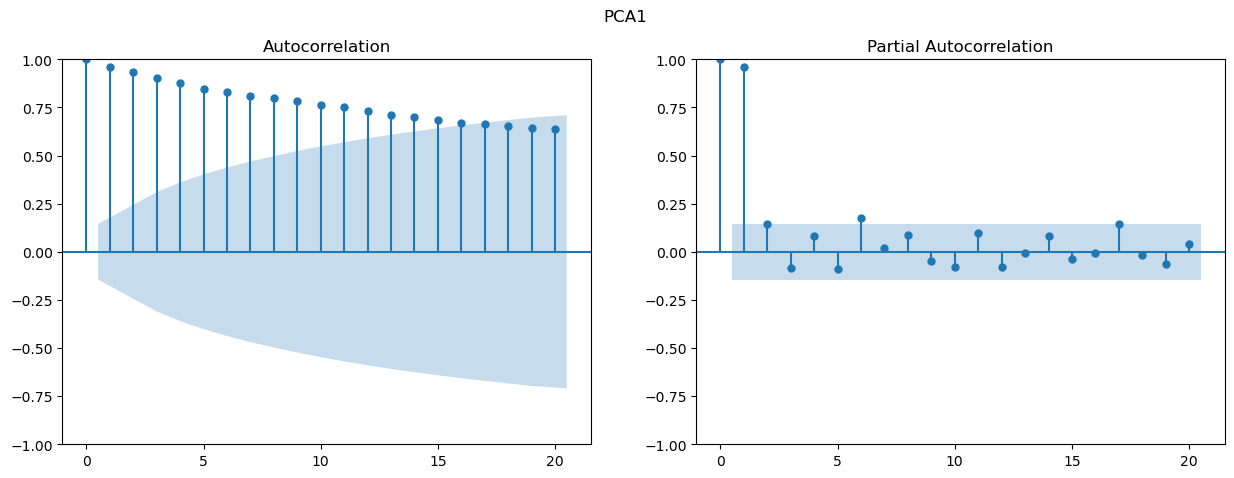

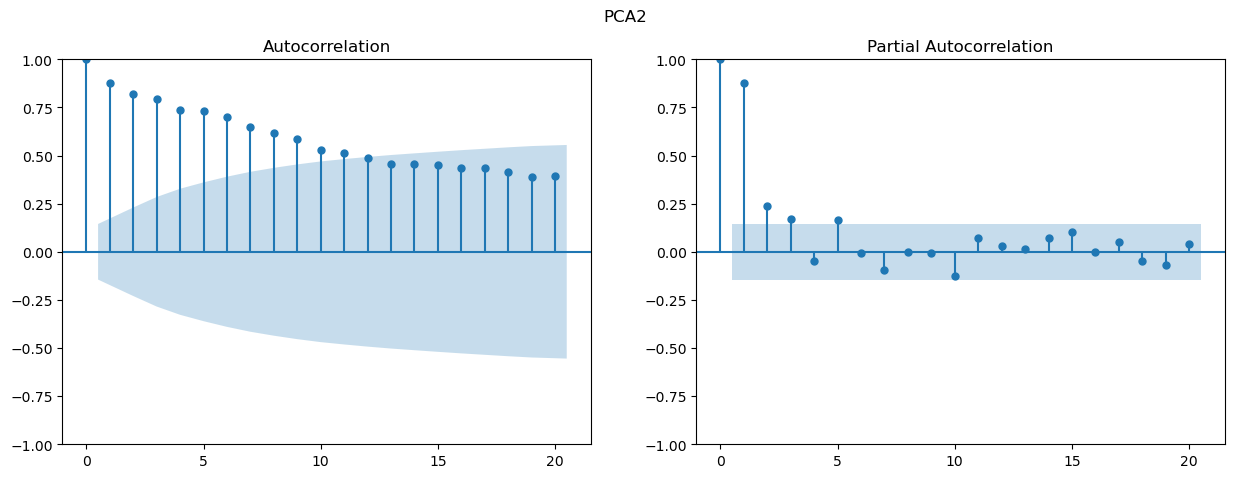

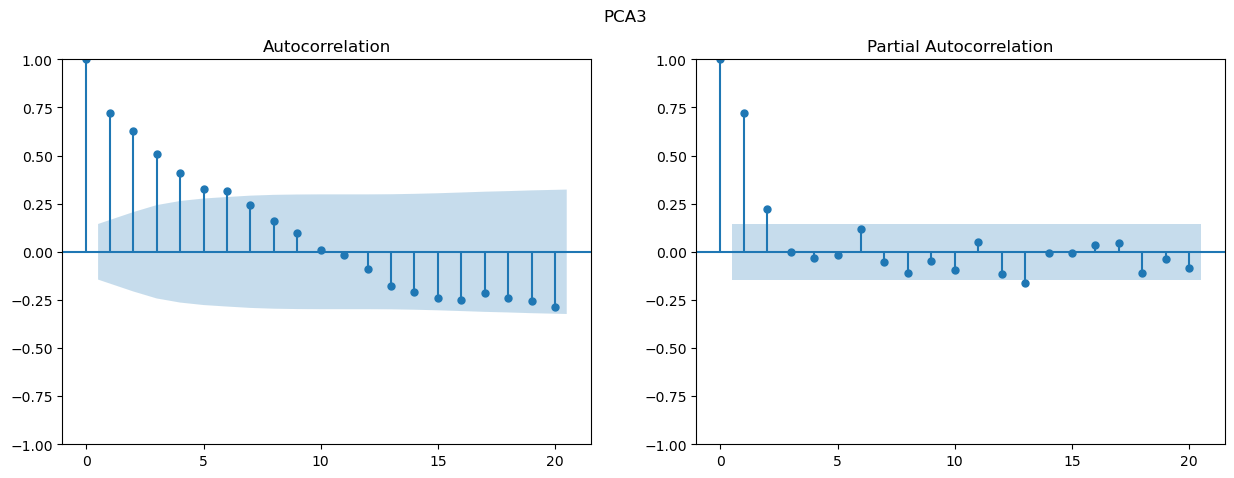

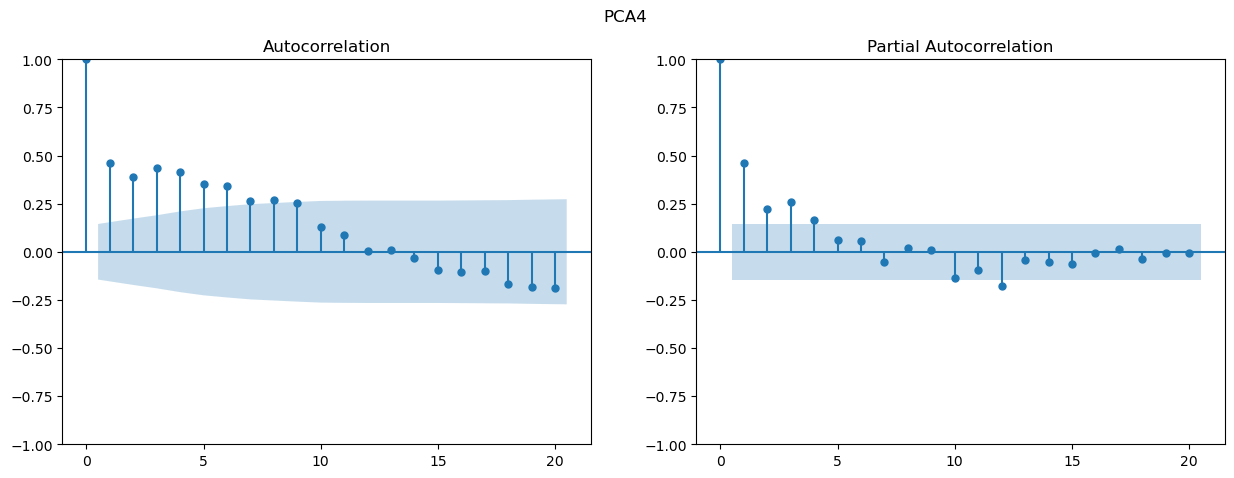

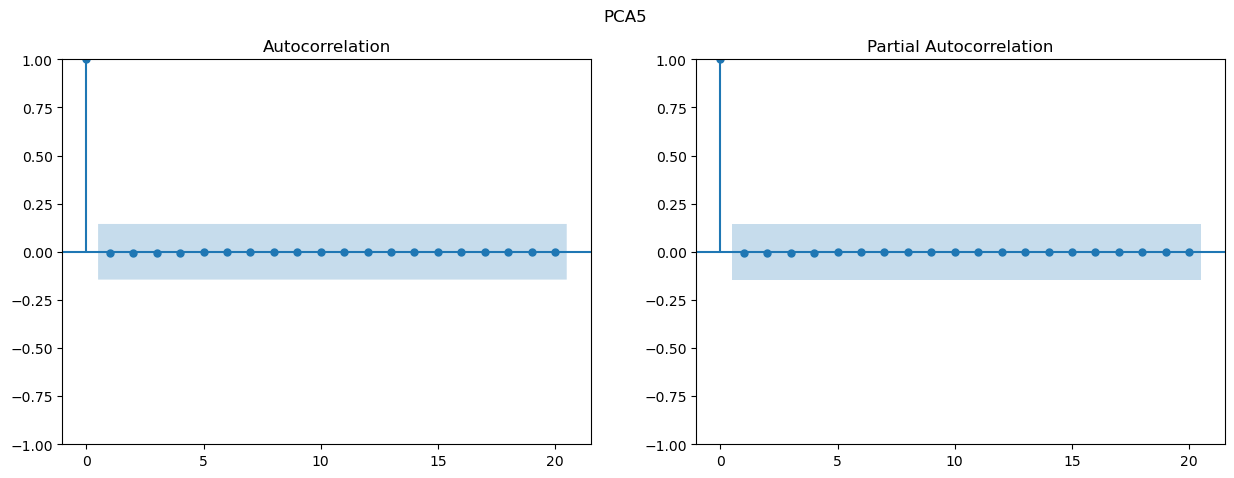

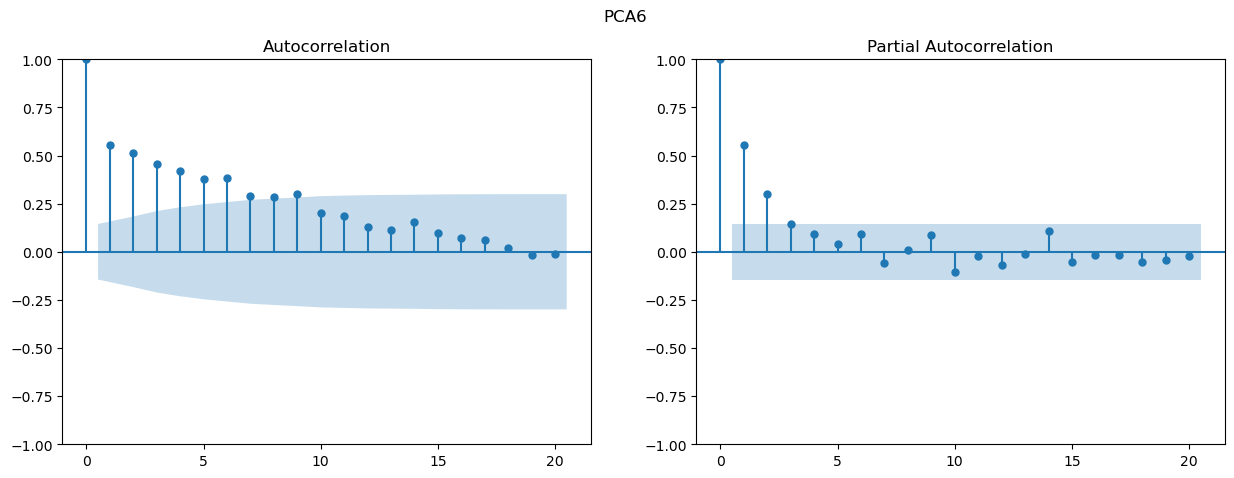

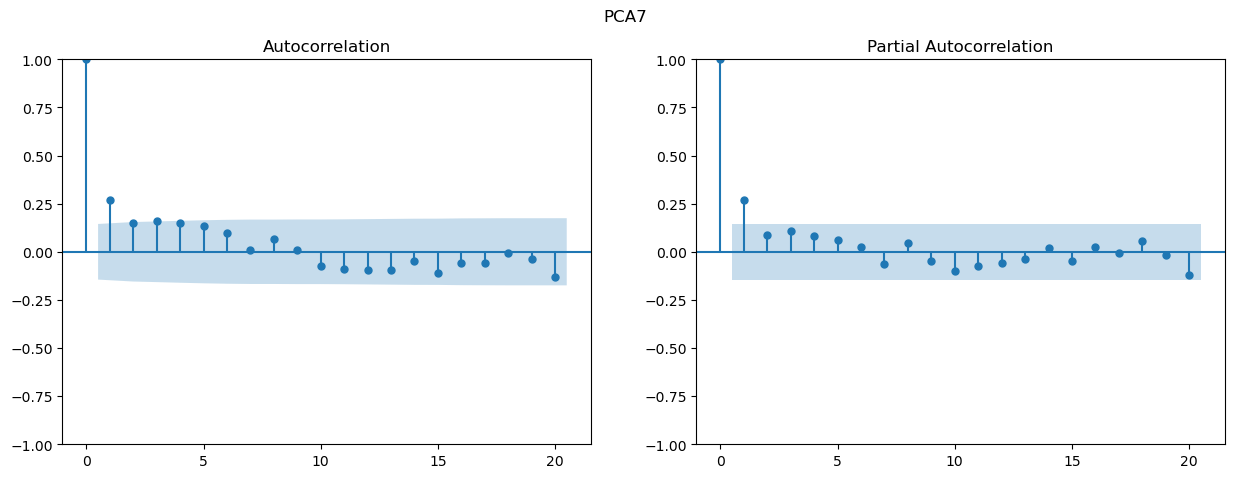

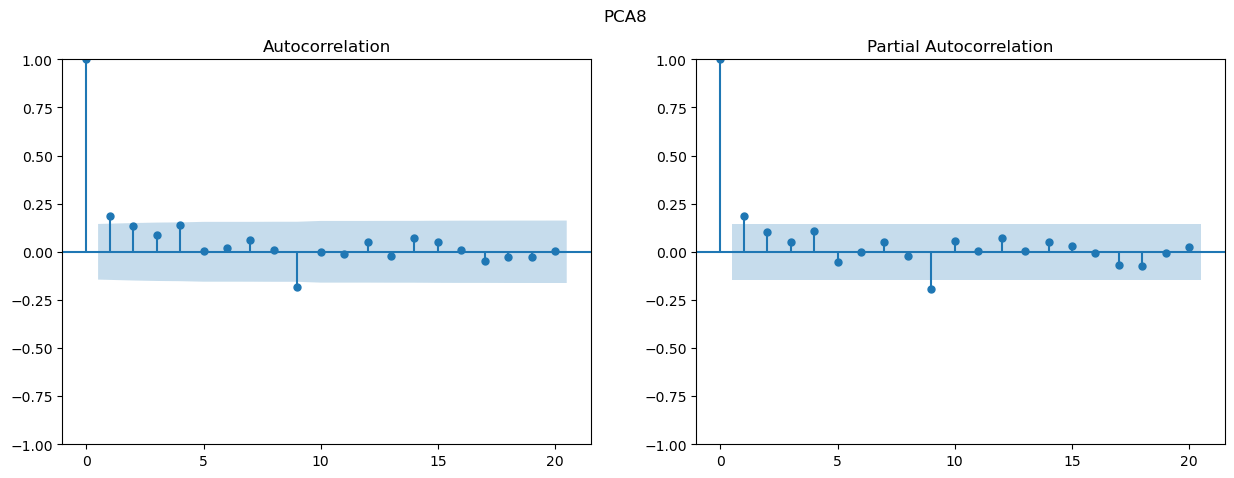

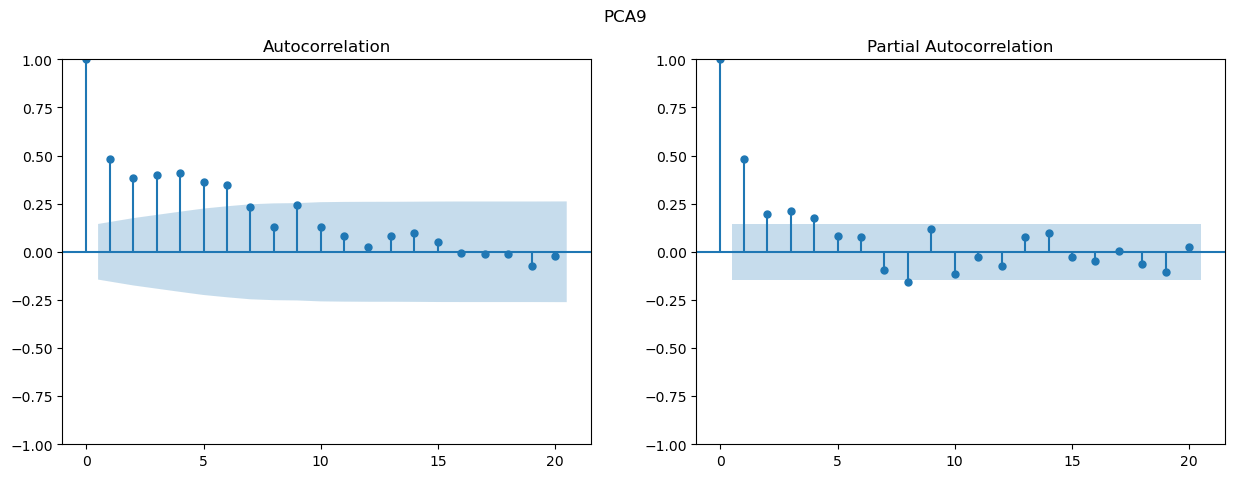

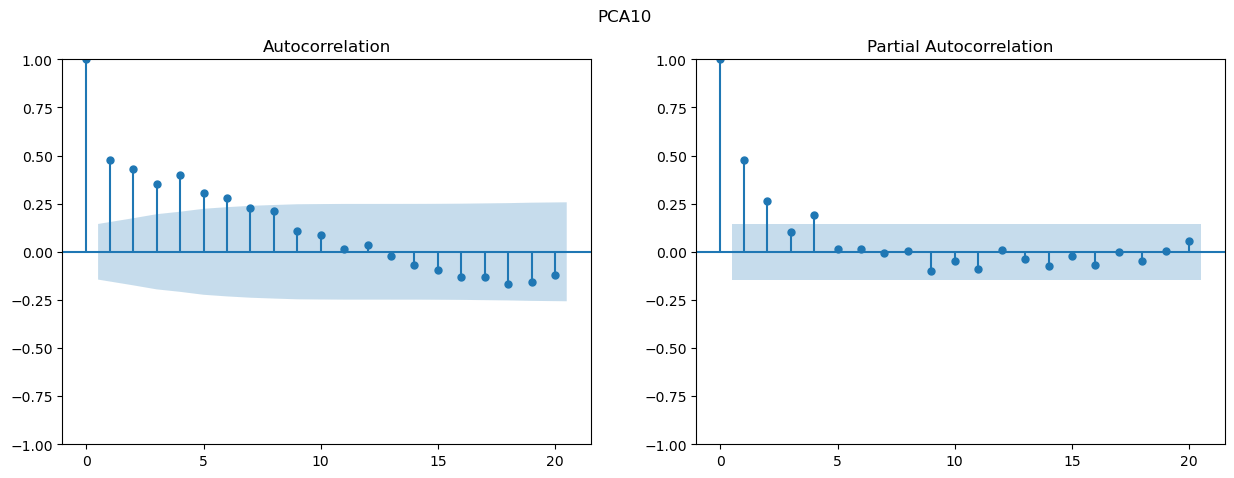

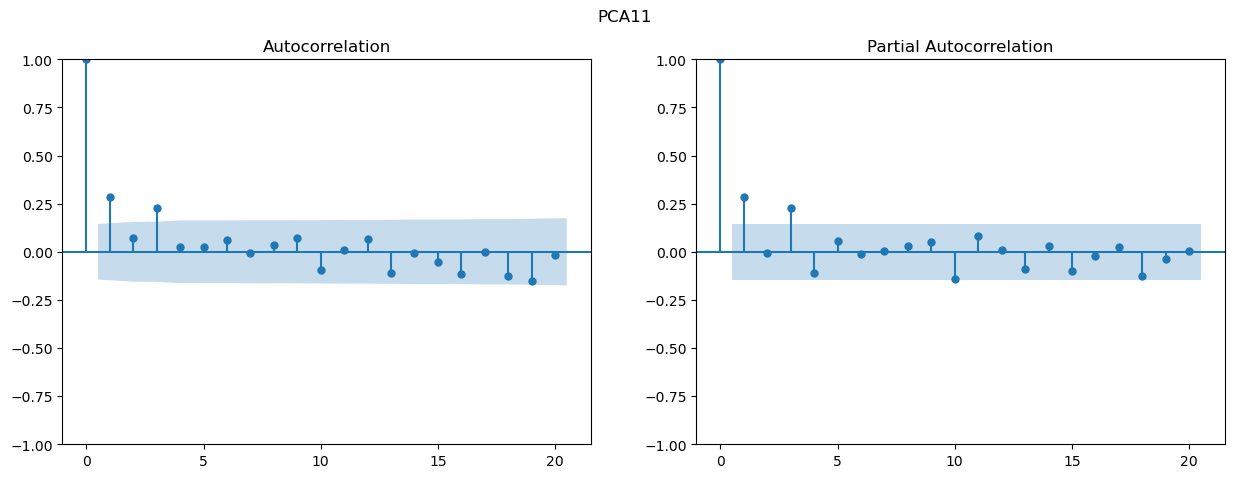

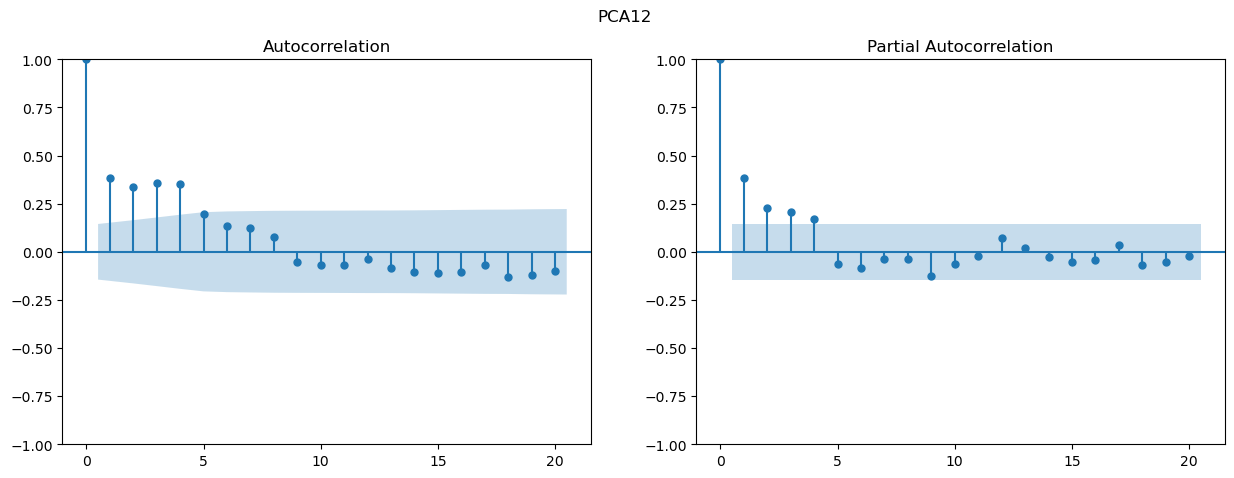

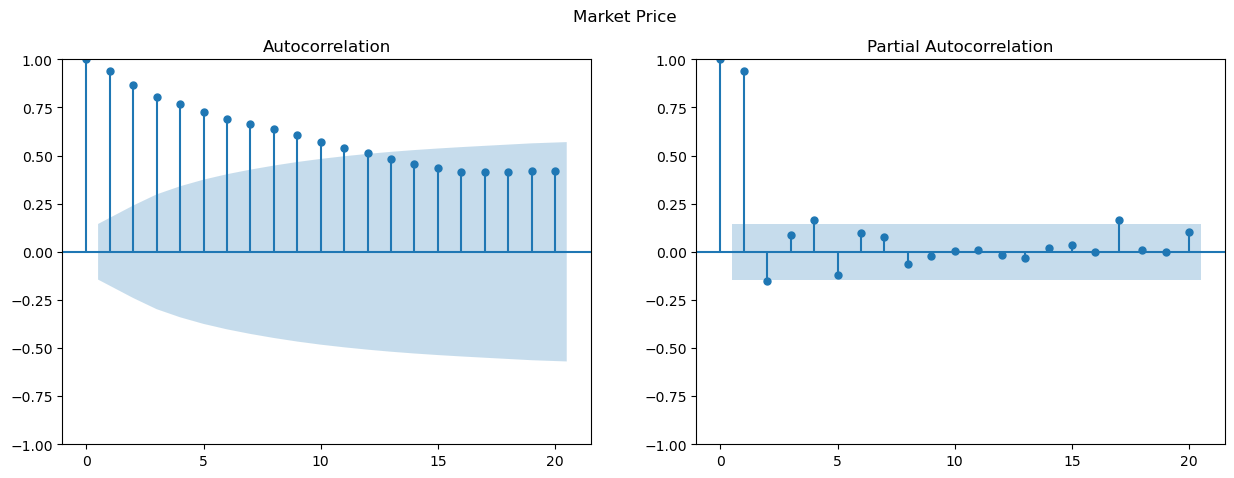

In [398]:
for col in monthly_pca_bitcoin_df.columns:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    plot_acf(monthly_pca_bitcoin_df[col], lags=20, alpha=0.05, ax=ax1)
    plot_pacf(monthly_pca_bitcoin_df[col], lags=20, alpha=0.05, ax=ax2)
    plt.suptitle(col)

In [399]:
for col in monthly_pca_bitcoin_df.columns:
    results = adfuller(monthly_pca_bitcoin_df[col])
    print(f'{col}: {results[1]}')

PCA1: 0.9944748550606024
PCA2: 0.6517859771979693
PCA3: 0.0013995197695529913
PCA4: 0.004092780530273395
PCA5: 9.140132376773319e-05
PCA6: 0.7336435104690945
PCA7: 7.825905735425065e-07
PCA8: 2.4753876513904543e-20
PCA9: 0.03954767702106017
PCA10: 0.012464863379960804
PCA11: 1.1540659673330123e-05
PCA12: 0.0015688317695837755
Market Price: 0.9193719866523259


As per the adfuller test: PCA's _1, 2, 6_ and _Market Price_ are non-stationary whilst the rest are comfortably below our p-values indicating their usefulness for modeling.

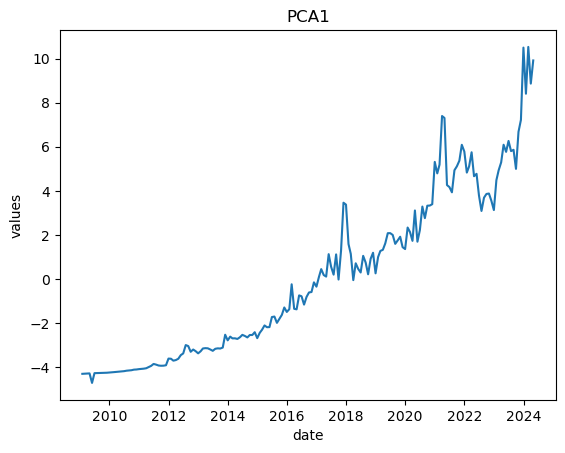

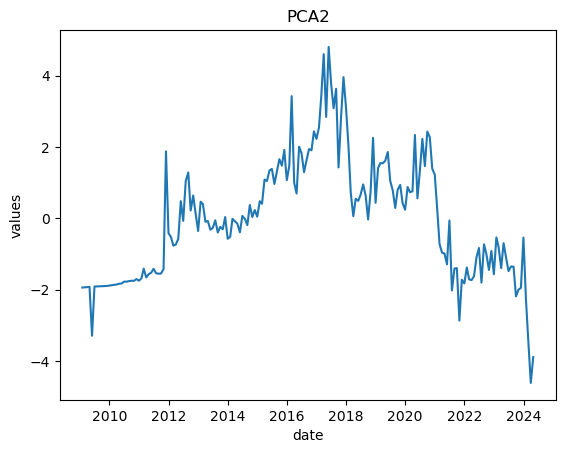

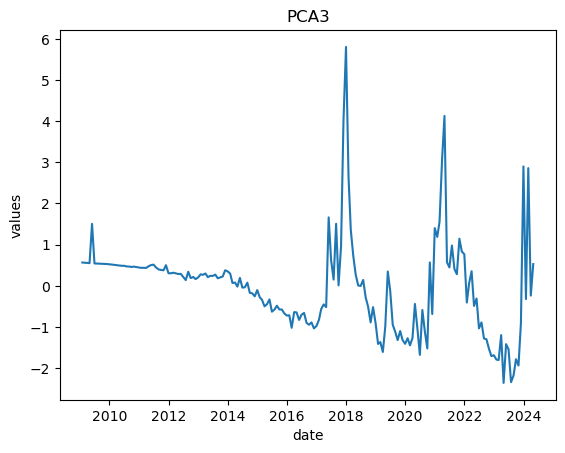

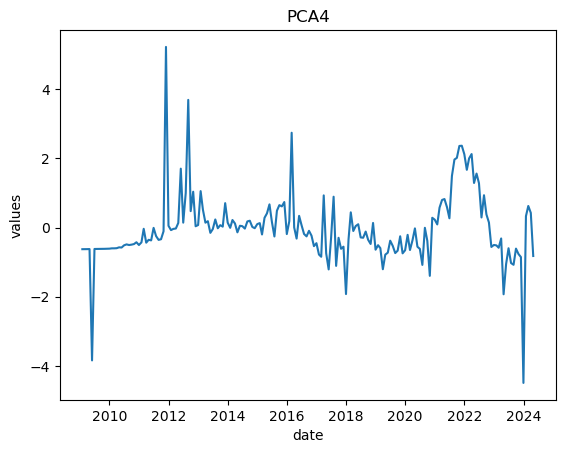

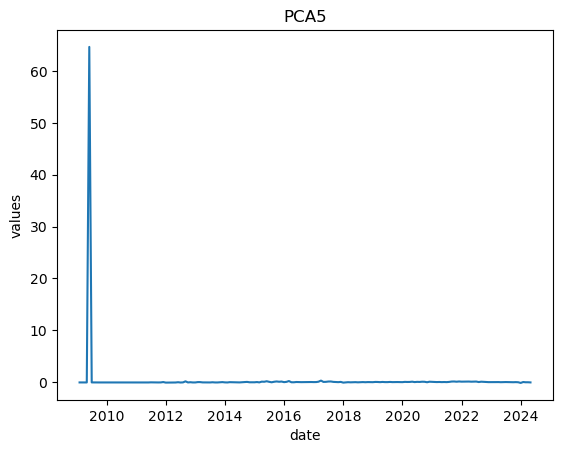

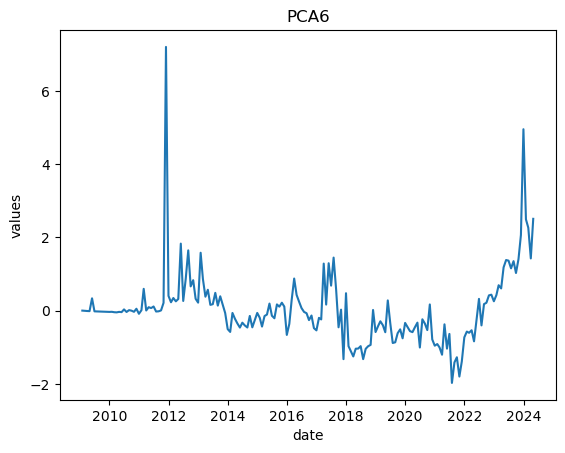

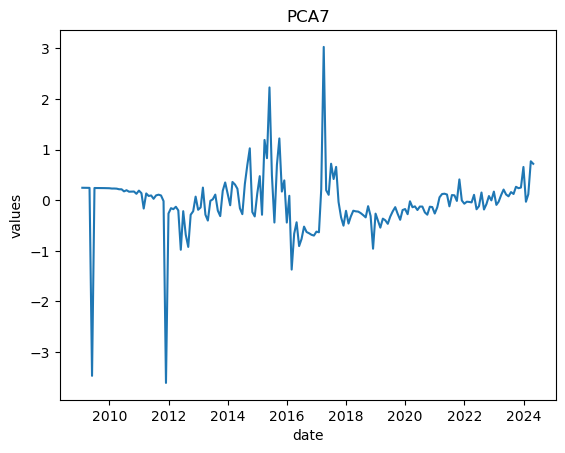

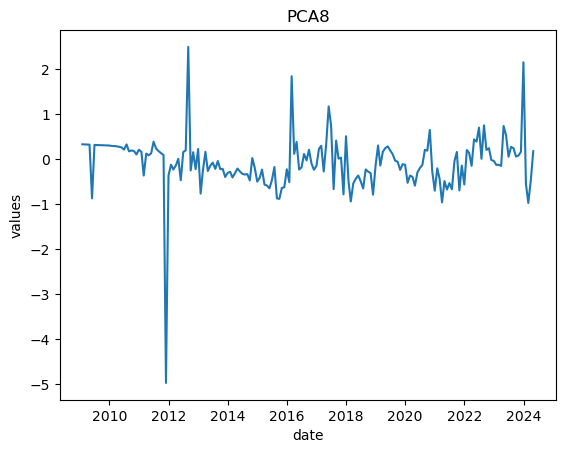

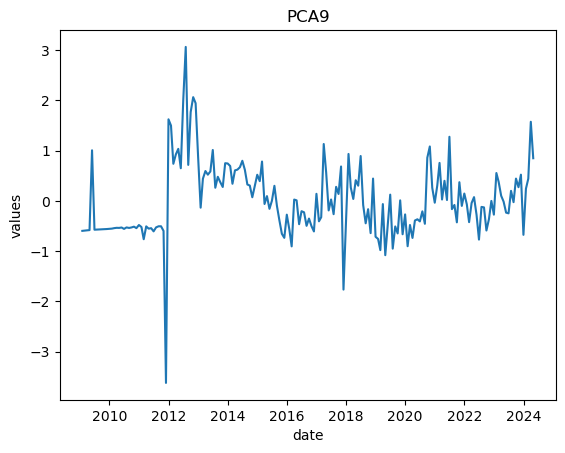

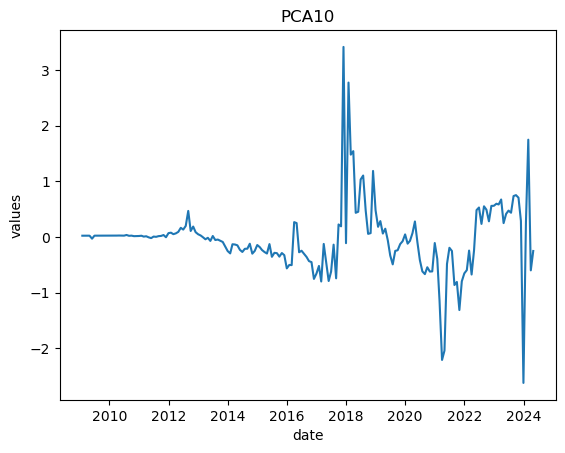

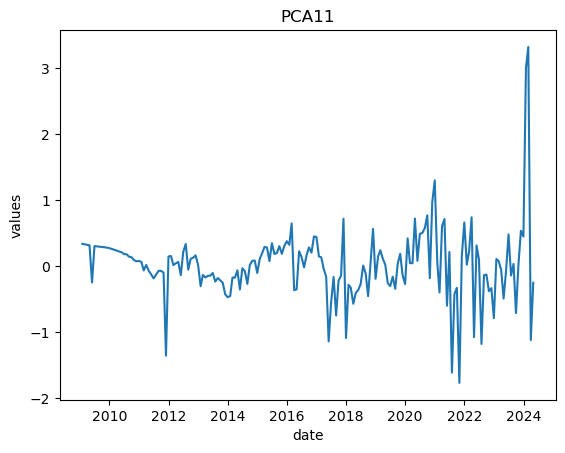

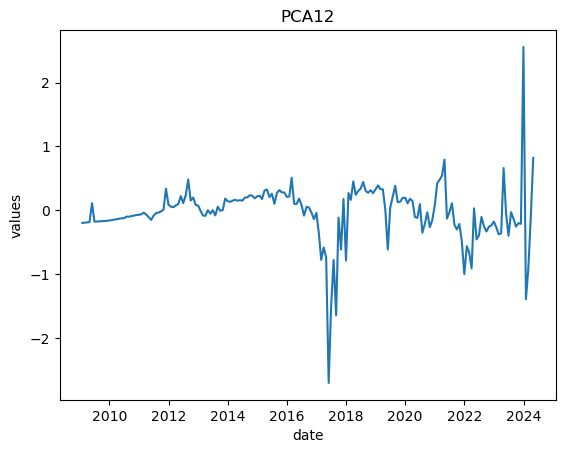

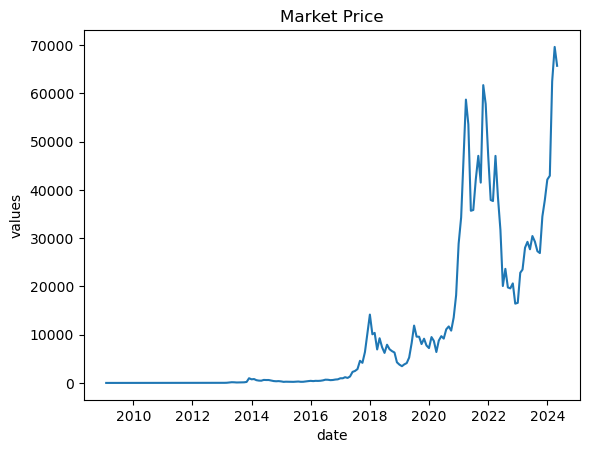

In [400]:
for feature in monthly_pca_bitcoin_df.columns:
    sns.lineplot(monthly_pca_bitcoin_df[feature])
    plt.title(feature)
    plt.xlabel('date')
    plt.ylabel('values')
    plt.show()
    plt.close()

c:\Users\micha\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


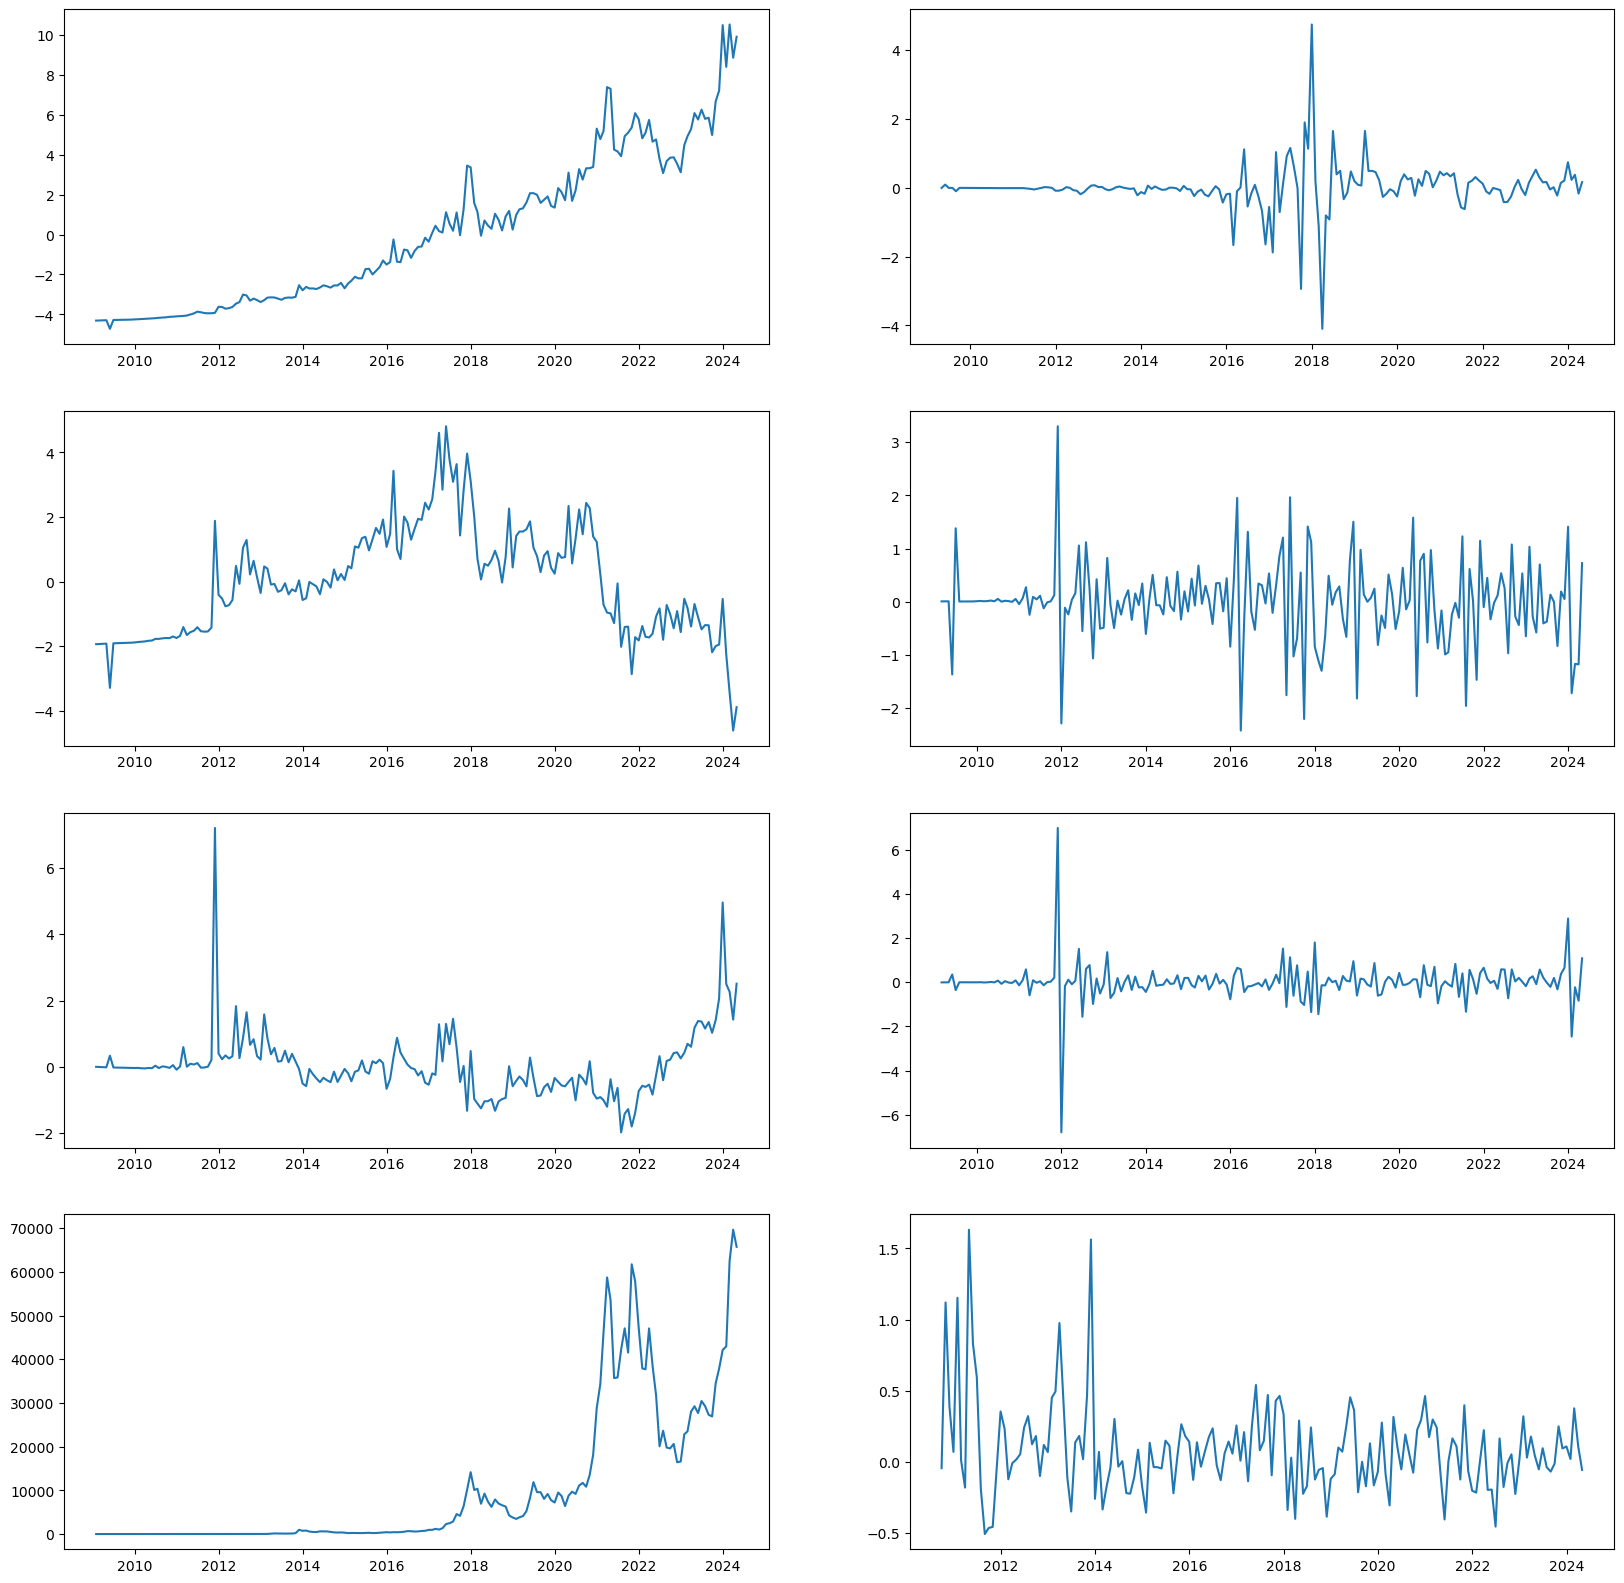

In [401]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(20,20))

ax[0][0].plot(monthly_pca_bitcoin_df['PCA1'])
ax[0][1].plot(np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff(3))

ax[1][0].plot(monthly_pca_bitcoin_df['PCA2'])
ax[1][1].plot(monthly_pca_bitcoin_df['PCA2'].diff())

ax[2][0].plot(monthly_pca_bitcoin_df['PCA6'])
ax[2][1].plot(monthly_pca_bitcoin_df['PCA6'].diff())

ax[3][0].plot(monthly_pca_bitcoin_df['Market Price'])
ax[3][1].plot(np.log(abs(monthly_pca_bitcoin_df['Market Price'])).diff())

In [402]:
np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff()

date
2009-01-31         NaN
2009-02-28   -0.001500
2009-03-31   -0.001579
2009-04-30   -0.001569
2009-05-31    0.096101
                ...   
2023-12-31    0.374701
2024-01-31   -0.222413
2024-02-29    0.225337
2024-03-31   -0.172171
2024-04-30    0.112092
Freq: M, Name: PCA1, Length: 184, dtype: float64

That should take care of our Transformations necessary for our Models so let's save these transforms into our *monthly_pca_bitcoin_df* and proceed to our preprocessing phase.

In [403]:
for pc in ['PCA1', 'PCA2', 'PCA6', 'Market Price']:
    if pc == 'PCA1':
        monthly_pca_bitcoin_df[f'{pc}_stationary'] = np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff(3)
    elif pc == 'Market Price':
       monthly_pca_bitcoin_df[f'{pc}_stationary'] = np.log(abs(monthly_pca_bitcoin_df['Market Price'])).diff()
    else:
        monthly_pca_bitcoin_df[f'{pc}_stationary'] = monthly_pca_bitcoin_df[pc].diff()

C:\Users\micha\AppData\Local\Temp\ipykernel_59924\37240690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df[f'{pc}_stationary'] = np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff(3)
C:\Users\micha\AppData\Local\Temp\ipykernel_59924\37240690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df[f'{pc}_stationary'] = monthly_pca_bitcoin_df[pc].diff()
C:\Users\micha\AppData\Local\Temp\ipykernel_59924\37240690.py:7: SettingWithCopyWarning: 
A value is trying to be 

In [404]:
monthly_pca_bitcoin_df.dropna(inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_59924\1539485645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df.dropna(inplace=True)


In [405]:
monthly_pca_bitcoin_df.drop(index='2010-08-31', inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_59924\96756979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df.drop(index='2010-08-31', inplace=True)


In [406]:
for col in monthly_pca_bitcoin_df.columns:
    if col == 'PCA1' or col == 'PCA2' or col == 'PCA6' or col == 'Market Price':
        continue
    else:
        results = adfuller(monthly_pca_bitcoin_df[col])
        print(f'{col}: {results[1]}')

PCA3: 0.0024887571289670426
PCA4: 0.0031903743858384863
PCA5: 0.05240896926478116
PCA7: 0.0009089811213774789
PCA8: 3.371611243315286e-05
PCA9: 0.025955209065977446
PCA10: 0.022185681586967244
PCA11: 3.0456107336741435e-05
PCA12: 0.0033321345950458495
PCA1_stationary: 6.273045700180121e-07
PCA2_stationary: 9.797937885315451e-25
PCA6_stationary: 1.2098753698342123e-15
Market Price_stationary: 2.4465066872840788e-06


All of our features are now sufficiently stationary for the Analysis.

***
##### Pre-Processing
***
- Separate into _X_ and _y_ and create _train_, _test_ and/or _validate_ data sets


In [407]:
X_prime = monthly_pca_bitcoin_df[['PCA1_stationary', 'PCA2_stationary', 'PCA3', 'PCA4', 'PCA5', 'PCA6_stationary', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'Market Price_stationary']].rename(columns={'PCA1_stationary': 'PCA1',
                                                                                                                                                                                                                'PCA2_stationary': 'PCA2',
                                                                                                                                                                                                                'PCA6_stationary': 'PCA6',
                                                                                                                                                                                                                'Market Price_stationary': 'Market Price'})

In [408]:
X_prime.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Market Price
date,,,,,,,,,,,,,
2010-09-30,-0.010319,0.010471,0.457342,-0.493387,-0.087789,-0.014372,0.169396,0.196478,-0.528685,0.025425,0.136106,-0.089705,-0.045713
2010-10-31,-0.011720,-0.004247,0.466204,-0.476186,-0.088233,-0.031368,0.171458,0.183535,-0.512908,0.015964,0.093078,-0.083149,1.119890
2010-11-30,-0.010678,0.051437,0.454114,-0.423881,-0.088609,0.083576,0.126553,0.108282,-0.542487,0.017146,0.074371,-0.073406,0.387766
2010-12-31,-0.011909,-0.046599,0.445535,-0.503403,-0.089173,-0.137684,0.189747,0.212922,-0.480426,0.018838,0.080851,-0.069971,0.068993
2011-01-31,-0.007835,0.065953,0.435146,-0.427536,-0.087742,0.097656,0.138537,0.162758,-0.519869,0.023465,0.063826,-0.061376,1.152680


- ##### ARIMA MODELS #####
***

In [409]:
# Univariate Model data
X_univar = X_prime['Market Price']

X_train = X_univar[:int(len(X_univar) * 0.8)]
X_test = X_univar[int(len(X_univar) * 0.8):]

In [410]:
def ARIMA_model_selector(X, pval=3, dval=3, qval=3):
    '''Takes a univarate dataset and p, d, q parameters for an ARIMA model
    and fits, measures, and visualizes the resultant data. selects the best scores
    from both the AIC and BIC metrics and takes their full diagnostic for suitability
    returns metrics_df for further diagnostics if the lowest AIC/BIC scores are not suitable'''
    # Test Models
    model_metrics = {'AIC': {}, 'BIC': {}, 'pdq': {}}
    best_models = {'AIC': None, 'BIC': None}

    for d in range(dval):
        for p in range(pval):
            for q in range(qval):
                try:
                    model = ARIMA(X, order=(p,d,q))
                    results = model.fit()

                    model_metrics['AIC'][f'ARIMA({p},{d},{q})'] = results.aic
                    model_metrics['BIC'][f'ARIMA({p},{d},{q})'] = results.bic
                    model_metrics['pdq'][f'ARIMA({p},{d},{q})'] = (p,d,q)

                    if best_models['AIC'] == None and best_models['BIC'] == None:
                        best_models['AIC'] = [model, results]
                        best_models['BIC'] = [model, results]

                    elif best_models['AIC'][1].aic > results.aic and best_models['BIC'][1].bic > results.bic:
                        best_models['AIC'] = [model, results]
                        best_models['BIC'] = [model, results]
                        print('\nUpdated ARIMA aic and bic selection:')
                        print(f'order: ({p}, {d}, {q}) aic-score: {results.aic} bic-score:{results.bic}')

                    elif best_models['AIC'][1].aic > results.aic and best_models['BIC'][1].bic < results.bic:
                        best_models['AIC'] = [model, results]
                        print('\nUpdated ARIMA aic selection:')
                        print(f'order: ({p}, {d}, {q}) score: {results.aic}')

                    elif best_models['BIC'][1].bic > results.bic and best_models['AIC'][1].aic < results.aic:
                        best_models['BIC'] = [model, results]
                        print('\nUpdated ARIMA bic selection:')
                        print(f'order: ({p}, {d}, {q}) score: {results.bic}')

                    else:
                        print(p, d, q, results.aic, results.bic)

                except:
                    print(p, d, q, None, None)
    # Visualize AIC vs BIC scores            
    metrics_df = pd.DataFrame(model_metrics)

    plt.plot(metrics_df['AIC'], label='AIC')
    plt.plot(metrics_df['BIC'], label='BIC')
    plt.legend()
    plt.title('Model Fit Metrics')
    plt.xlabel('Models')
    plt.xticks(rotation=90)
    plt.ylabel('Scores')
    plt.show()

    # Select lowest scores from AIC and BIC and then pull their Summary and visualize their full metrics.
    for key in best_models:
        best_models[key][1].plot_diagnostics()
        print(best_models[key][1].summary())
    
    return metrics_df, best_models


Updated ARIMA aic and bic selection:
order: (0, 0, 1) aic-score: 86.28826609879086 bic-score:95.58786538226346
0 0 2 88.28776770922504 100.68723342052184
1 0 0 86.31163868358463 95.61123796705724
1 0 1 88.284626420054 100.6840921313508
1 0 2 90.0589538720167 105.5582860111377
2 0 0 88.30568505431971 100.70515076561651
2 0 1 89.92820187605619 105.42753401517719


c:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 0 2 91.57508992704611 110.1742884939913
0 1 0 161.3891252107116 164.48287541151836
0 1 1 95.76341729888249 101.950917700496
0 1 2 90.39342212280235 99.67467272522263
1 1 0 137.32116118994617 143.5086615915597
1 1 1 90.55108396159403 99.83233456401432
1 1 2 92.3521079789929 104.72710878221996
2 1 0 120.25230916664276 129.53355976906306
2 1 1 92.51899056189062 104.89399136511767
2 1 2 94.08445413224264 109.55320513627646
0 2 0 322.0260476686599 325.11364400389226
0 2 1 168.50718857100247 174.68238124146723
0 2 2 107.85461479607096 117.11740380176812
1 2 0 257.74553561774275 263.9207282882075
1 2 1 145.2463690239241 154.50915802962126


c:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 2 2 101.78102645632832 114.13141179725785
2 2 0 204.85308029398882 214.11586929968598


c:\Users\micha\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 2 1 128.8603875724877 141.2107729134172
2 2 2 103.77702006791641 119.21500174407834


c:\Users\micha\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


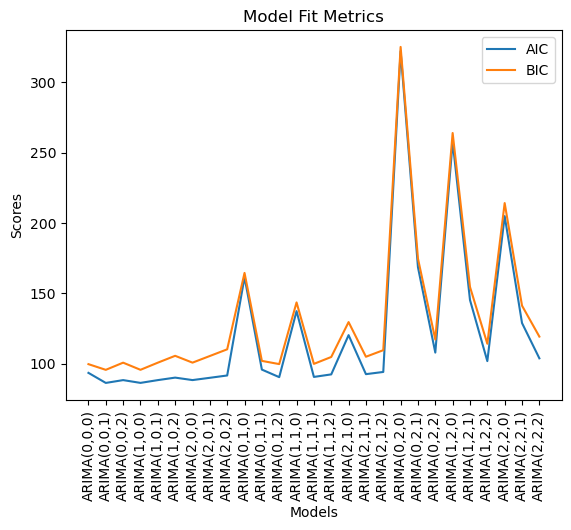

                               SARIMAX Results                                
Dep. Variable:           Market Price   No. Observations:                  164
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -40.144
Date:                Sun, 28 Apr 2024   AIC                             86.288
Time:                        09:18:37   BIC                             95.588
Sample:                    09-30-2010   HQIC                            90.064
                         - 04-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0836      0.039      2.163      0.031       0.008       0.159
ma.L1          0.2395      0.067      3.548      0.000       0.107       0.372
sigma2         0.0955      0.006     14.959      0.0

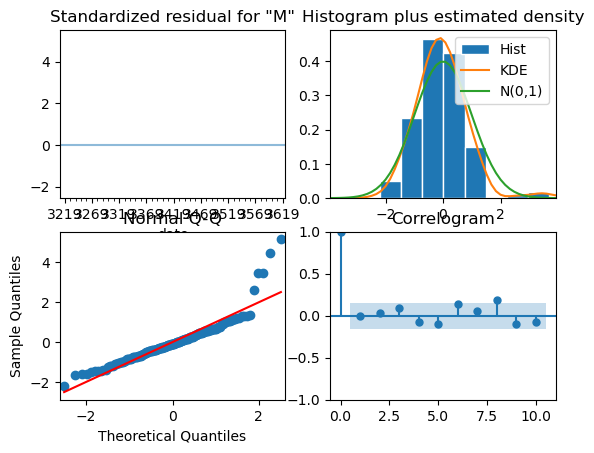

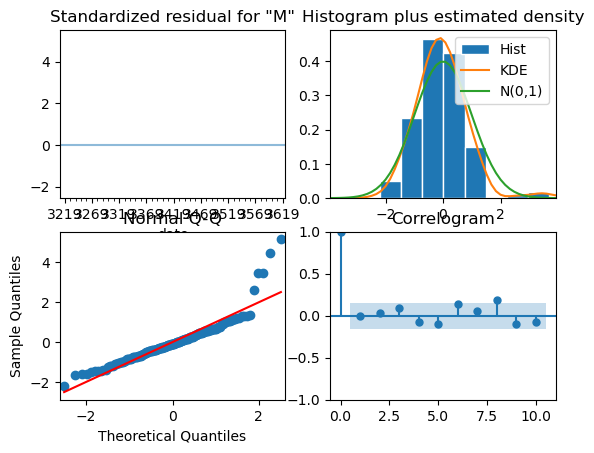

In [411]:
metrics_df, best_models = ARIMA_model_selector(X_univar)

These results concur from both the AIC and BIC scores that an ARIMA(0,0,1) or MA model would work best for this univariate series. the summary in the Prob(Q) confirms that residuals are definitely uncorrelated, our theoretical quantiles are reasonabley close to the linear regression and almost all points fall within the confidence area of the correlogram.  So without very little doubt as to the this being the best univariate ARIMA (MA) Model we could do.

In [412]:
def convert_stationary_predictions_to_original_predictions(stationary_predictions, original_data):
  """Converts stationary predictions to original predictions.

  Args:
    stationary_predictions: A NumPy array of stationary predictions.
    original_data: A NumPy array of original data.

  Returns:
    A NumPy array of original predictions.
  """

  # Calculate the cumulative sum of the stationary predictions.
  cumulative_sum = np.cumsum(stationary_predictions)

  # Add the first value of the original data to the cumulative sum.
  try:
    cumulative_sum += original_data.iloc[0]
  except:
    cumulative_sum += original_data[0]

  # Calculate the original predictions by taking the exponential of the cumulative sum.
  original_predictions = np.exp(cumulative_sum)

  return original_predictions

In [413]:
ARIMA_model, ARIMA_results = best_models['AIC']

In [414]:
ARIMA_predictions = ARIMA_results.get_prediction(start=0)
ARIMA_predictions_orig = convert_stationary_predictions_to_original_predictions(ARIMA_predictions.predicted_mean[-len(X_test):], X_test)

In [415]:
ARIMA_predictionsci = ARIMA_predictions.conf_int()

In [416]:
lower_ci = ARIMA_predictionsci['lower Market Price']
upper_ci = ARIMA_predictionsci['upper Market Price']

In [417]:
rmse = np.sqrt(mean_squared_error(X_test, ARIMA_predictions.predicted_mean[-len(X_test):]))
print('RMSE:', rmse)

RMSE: 0.19657976269929658


In [418]:
ARIMA_predictions_orig

date
2021-08-31     1.233892
2021-09-30     1.343988
2021-10-31     1.389192
2021-11-30     1.647675
2021-12-31     1.692935
2022-01-31     1.741251
2022-02-28     1.784924
2022-03-31     1.926471
2022-04-30     2.168671
2022-05-31     2.185529
2022-06-30     2.262763
2022-07-31     2.186903
2022-08-31     2.492657
2022-09-30     2.516832
2022-10-31     2.723536
2022-11-30     2.941422
2022-12-31     2.973116
2023-01-31     3.231889
2023-02-28     3.717547
2023-03-31     3.935271
2023-04-30     4.402686
2023-05-31     4.707103
2023-06-30     4.971414
2023-07-31     5.456727
2023-08-31     5.747290
2023-09-30     6.068984
2023-10-31     6.490615
2023-11-30     7.369273
2023-12-31     7.947144
2024-01-31     8.705760
2024-02-29     9.302378
2024-03-31    10.889744
2024-04-30    11.700603
Freq: M, Name: predicted_mean, dtype: float64

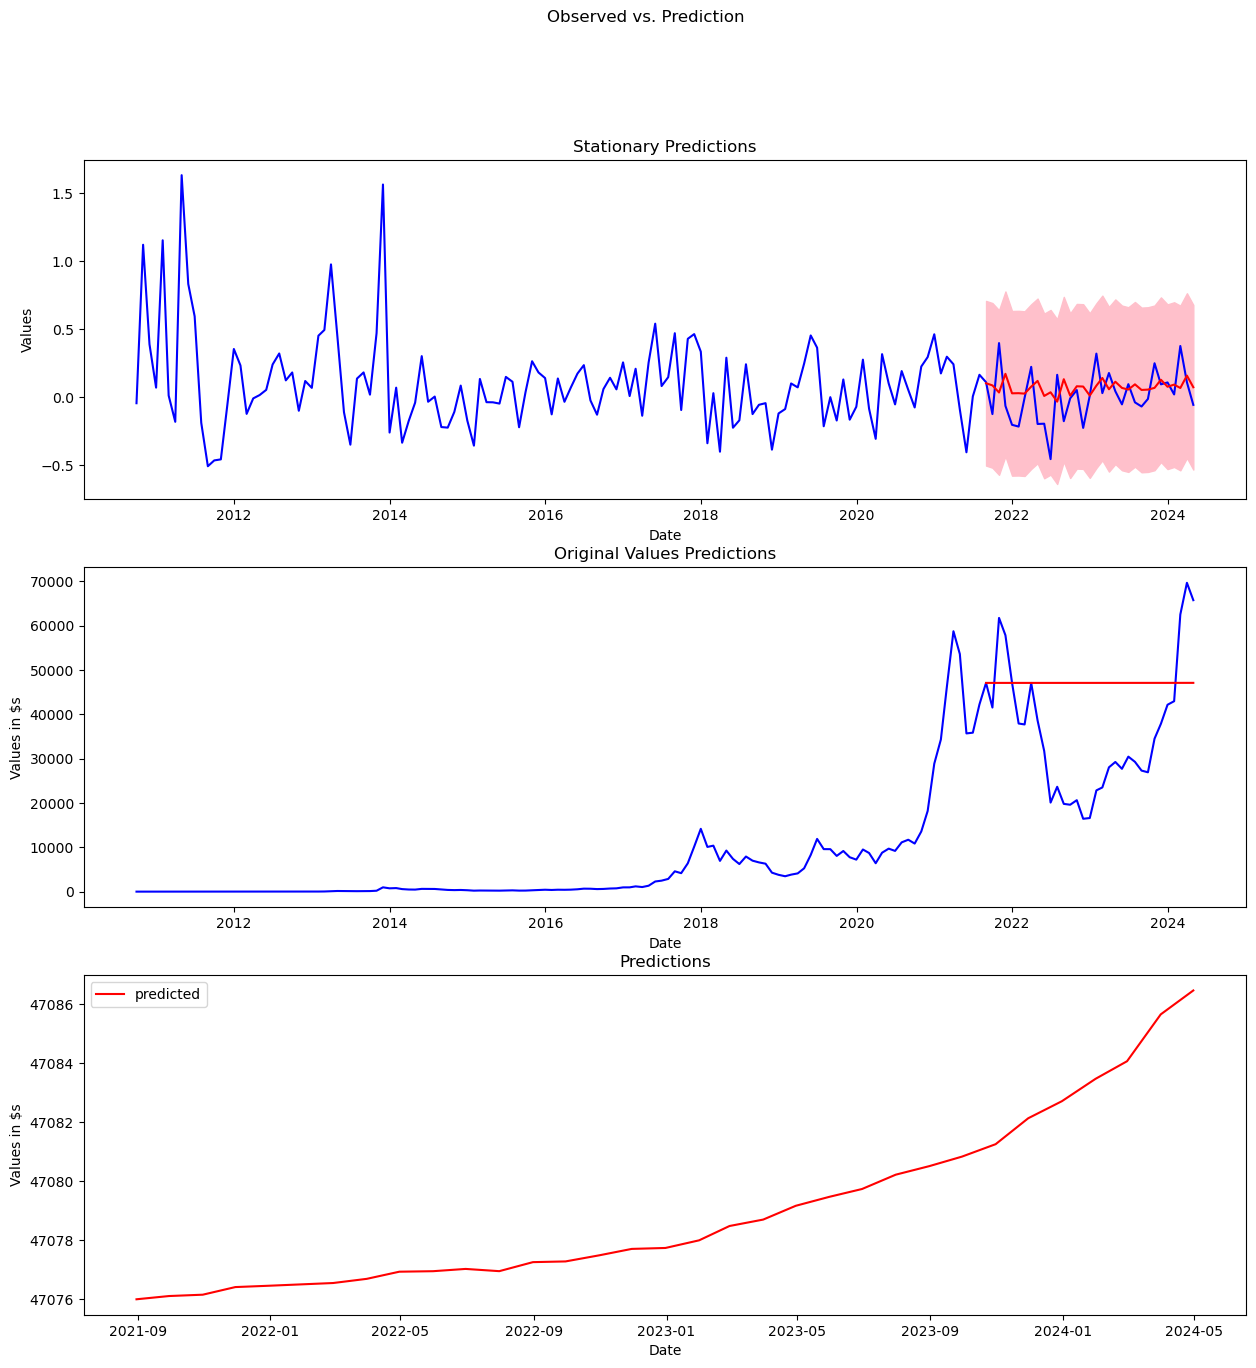

In [419]:
_, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(15,15))
ax1.plot(X_prime['Market Price'], label='observed', color='blue')
ax1.plot(ARIMA_predictions.predicted_mean[-len(X_test):], label='predicted', color='red')
ax1.fill_between(ARIMA_predictionsci.index[-len(X_test):], lower_ci[-len(X_test):], upper_ci[-len(X_test):], color='pink')
ax1.set_xlabel('Date')
ax1.set_ylabel('Values')
ax1.set_title('Stationary Predictions')

ax2.plot(monthly_pca_bitcoin_df['Market Price'], label='observed', color='blue')
ax2.plot((ARIMA_predictions_orig[-len(X_test):] + monthly_pca_bitcoin_df['Market Price'].iloc[int(len(X_univar) * 0.8)]), label='predicted', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Values in $s')
ax2.set_title('Original Values Predictions')

ax3.plot((ARIMA_predictions_orig[-len(X_test):] + monthly_pca_bitcoin_df['Market Price'].iloc[int(len(X_univar) * 0.8)]), color='red', label='predicted')
ax3.set_xlabel('Date')
ax3.set_ylabel('Values in $s')
ax3.set_title('Predictions')

plt.suptitle('Observed vs. Prediction')
plt.legend()
plt.show()

So interesting results here from the model predictions.  When left visually with the stationary time-series, the line seems to move to predict what the next value problably is, when including the area included within the Confidence interval range, the true values all fall within this confidence interval, which is a good thing.  However when we return the Time series to their original values and transform the predictions to match, it looks just like a straight line. and when we look closer it appears to be a very low exponential curve happening here.  There is a very broad degree of variability happening which a simple univariate model won't be able to capture it seems so thus, we will try an LSTM model next and see if it performs any better.

- ##### LSTM MODELS #####
***

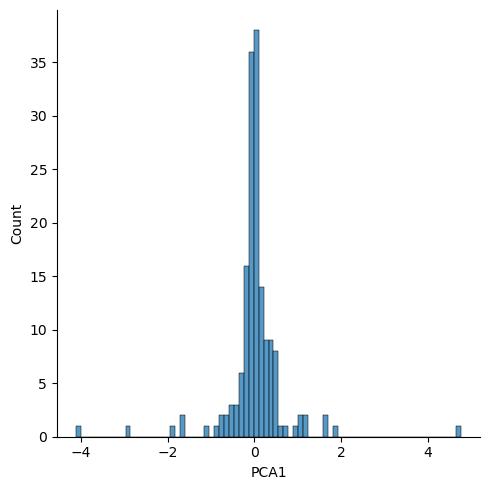

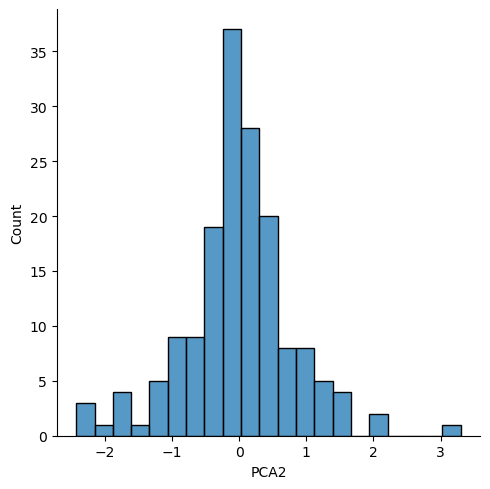

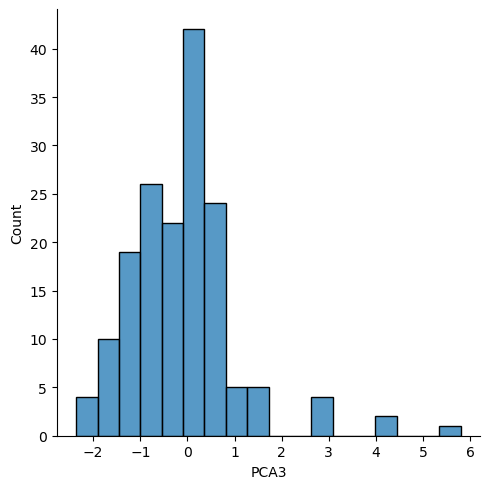

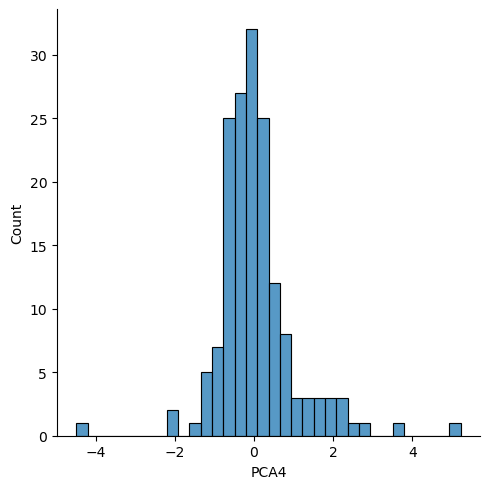

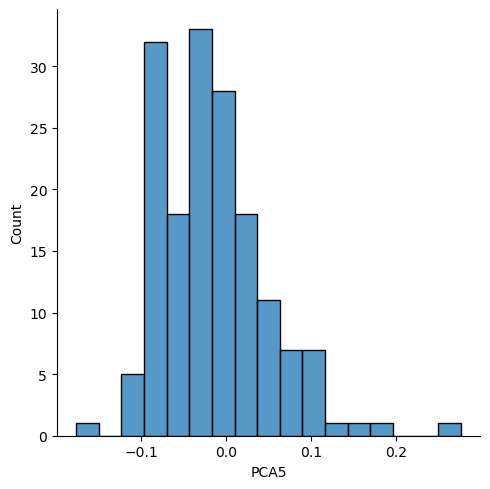

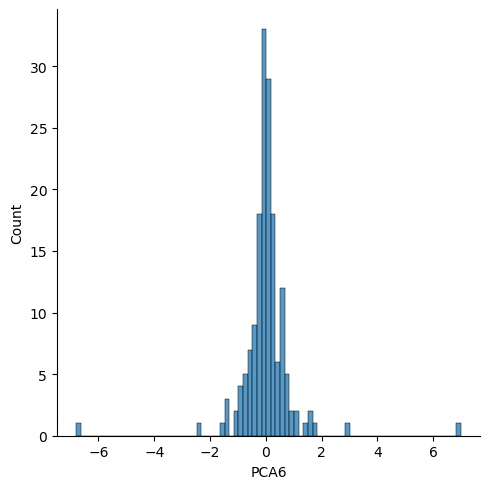

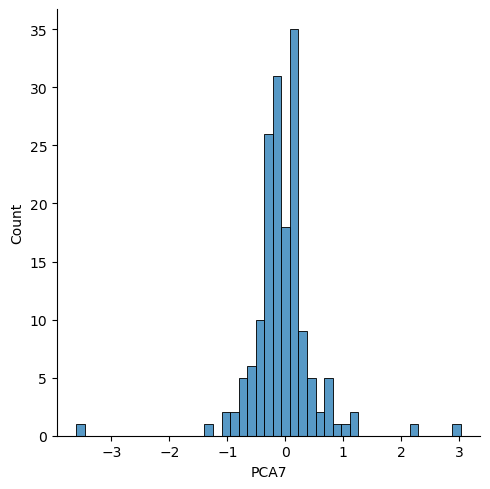

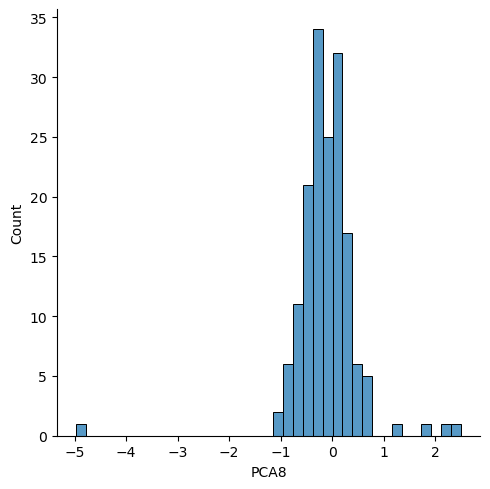

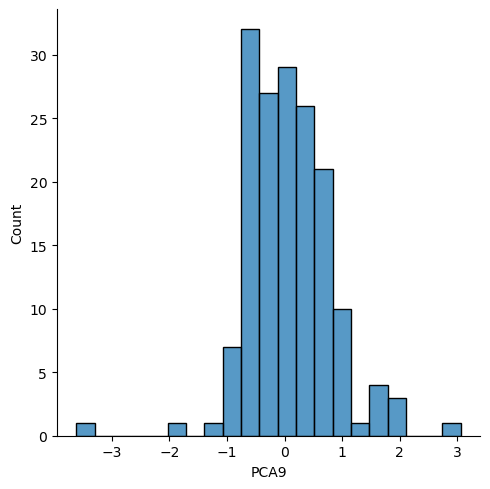

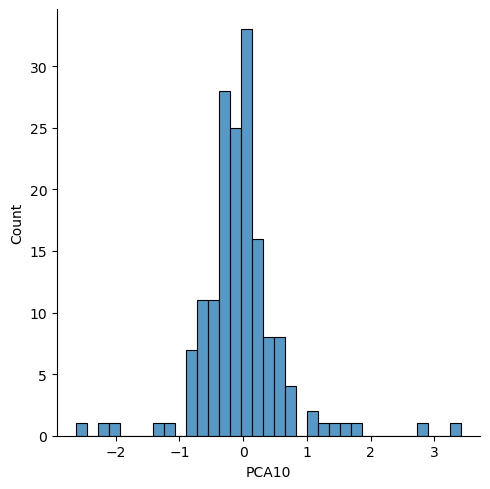

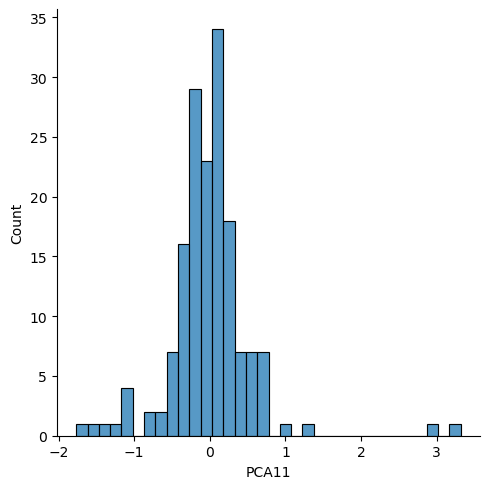

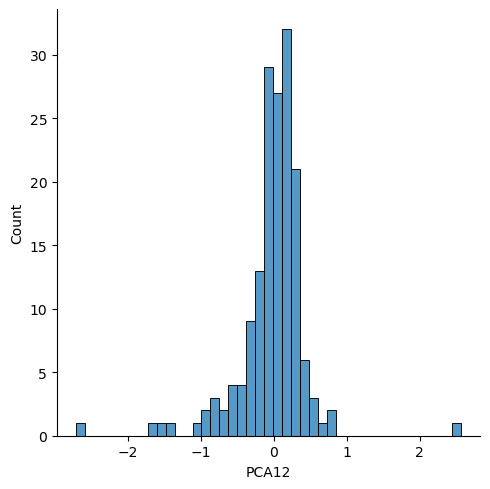

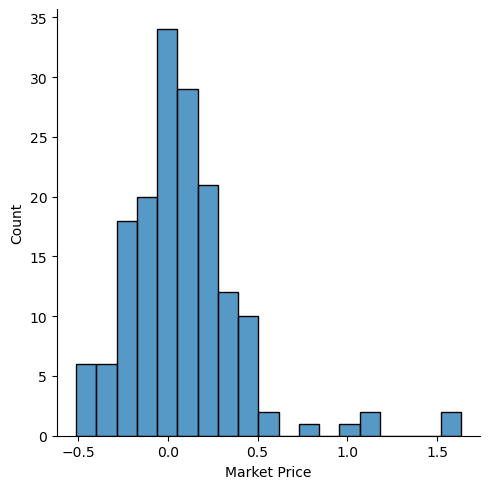

In [420]:
for col in X_prime.columns:
    sns.displot(X_prime[col])

Good news! data is fairly normally distributed with a few outliers, so without further ado, we are good to continue creating our LSTM

In [421]:
X_prime

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Market Price
date,,,,,,,,,,,,,
2010-09-30,-0.010319,0.010471,0.457342,-0.493387,-0.087789,-0.014372,0.169396,0.196478,-0.528685,0.025425,0.136106,-0.089705,-0.045713
2010-10-31,-0.011720,-0.004247,0.466204,-0.476186,-0.088233,-0.031368,0.171458,0.183535,-0.512908,0.015964,0.093078,-0.083149,1.119890
2010-11-30,-0.010678,0.051437,0.454114,-0.423881,-0.088609,0.083576,0.126553,0.108282,-0.542487,0.017146,0.074371,-0.073406,0.387766
2010-12-31,-0.011909,-0.046599,0.445535,-0.503403,-0.089173,-0.137684,0.189747,0.212922,-0.480426,0.018838,0.080851,-0.069971,0.068993
2011-01-31,-0.007835,0.065953,0.435146,-0.427536,-0.087742,0.097656,0.138537,0.162758,-0.519869,0.023465,0.063826,-0.061376,1.152680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,0.743037,1.410909,2.899622,-4.491954,-0.176359,2.886822,0.656585,2.154545,-0.675373,-2.619437,0.449332,2.559044,0.107106
2024-01-31,0.230255,-1.723777,-0.321612,0.330822,-0.002533,-2.460098,-0.030421,-0.548412,0.242375,0.268071,3.001153,-1.392667,0.018858
2024-02-29,0.377626,-1.171459,2.858358,0.625125,-0.048904,-0.229467,0.117053,-0.970252,0.441752,1.748185,3.320366,-0.920113,0.375093


In [422]:
scaler = MinMaxScaler()

# LSTM_X_prime =  monthly_pca_bitcoin_df[monthly_pca_bitcoin_df.columns[:13]]
LSTM_X_prime = scaler.fit_transform(X_prime)

In [423]:
def to_X_y(array, window=5):
    #array = df.to_numpy()
    X = []
    y = []
    for i in range(len(array) - window):
        row = [k[:len(k)] for k in array[i: i + window,: -1]]
        X.append(row)
        label = array[i + window, -1]
        y.append(label)
        
    return np.array(X), np.array(y)

def train_test_val_split(X, y, train_length=0.75, val_length=0.15, test_length=0.10):
    # X, y train
    X_train, y_train = X[:int(round(len(X) * train_length))], y[:int(round(len(y) * train_length))]
    
    # X, y val
    X_val, y_val = X[:int(round(len(X) * val_length))], y[:int(round(len(y) * val_length))]
    
    # X, y test
    X_test, y_test = X[:int(round(len(X) * test_length))], y[:int(round(len(y) * test_length))]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [424]:
# Divide Data into X, y for Train, val and Test data
Window = 5
LSTM_X, LSTM_y = to_X_y(LSTM_X_prime, window=Window)
LSTM_X_train, LSTM_y_train, LSTM_X_val, LSTM_y_val, LSTM_X_test, LSTM_y_test = train_test_val_split(LSTM_X, LSTM_y)

In [425]:
print(f'Train_X: {LSTM_X_train.shape}\nTrain_y: {LSTM_y_train.shape}\nVal_X: {LSTM_X_val.shape}\nVal_y: {LSTM_y_val.shape}\nTest_X: {LSTM_X_test.shape}\nTest_y: {LSTM_y_test.shape}')

Train_X: (119, 5, 12)
Train_y: (119,)
Val_X: (24, 5, 12)
Val_y: (24,)
Test_X: (16, 5, 12)
Test_y: (16,)


Now we can proceed to build the Multivariate LSTM Model

In [426]:
model = Sequential()
model.add(LSTM(250, input_shape=(LSTM_X_train.shape[1], LSTM_X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(12))
model.add(Dense(1))
model.compile(loss=MeanAbsoluteError(), metrics=RootMeanSquaredError(), optimizer=Adam())

In [427]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 250)               263000    
                                                                 
 dropout_17 (Dropout)        (None, 250)               0         
                                                                 
 dense_31 (Dense)            (None, 12)                3012      
                                                                 
 dense_32 (Dense)            (None, 1)                 13        
                                                                 
Total params: 266,025
Trainable params: 266,025
Non-trainable params: 0
_________________________________________________________________


In [428]:
history = model.fit(LSTM_X_train,
                    LSTM_y_train,
                    epochs=250,
                    batch_size=72,
                    validation_data=(LSTM_X_val, LSTM_y_val),
                    verbose=2,
                    shuffle=False)

Epoch 1/250


2/2 - 1s - loss: 0.2435 - root_mean_squared_error: 0.3054 - val_loss: 0.2035 - val_root_mean_squared_error: 0.2436 - 1s/epoch - 679ms/step
Epoch 2/250
2/2 - 0s - loss: 0.2070 - root_mean_squared_error: 0.2398 - val_loss: 0.1888 - val_root_mean_squared_error: 0.2327 - 66ms/epoch - 33ms/step
Epoch 3/250
2/2 - 0s - loss: 0.1588 - root_mean_squared_error: 0.1942 - val_loss: 0.1437 - val_root_mean_squared_error: 0.2195 - 31ms/epoch - 16ms/step
Epoch 4/250
2/2 - 0s - loss: 0.1166 - root_mean_squared_error: 0.1700 - val_loss: 0.1850 - val_root_mean_squared_error: 0.2579 - 36ms/epoch - 18ms/step
Epoch 5/250
2/2 - 0s - loss: 0.1400 - root_mean_squared_error: 0.1966 - val_loss: 0.1692 - val_root_mean_squared_error: 0.2444 - 31ms/epoch - 16ms/step
Epoch 6/250
2/2 - 0s - loss: 0.1243 - root_mean_squared_error: 0.1748 - val_loss: 0.1377 - val_root_mean_squared_error: 0.2141 - 31ms/epoch - 16ms/step
Epoch 7/250
2/2 - 0s - loss: 0.1111 - root_mean_squared_error: 0.1620 - val_loss: 0.1473 - val_root_m

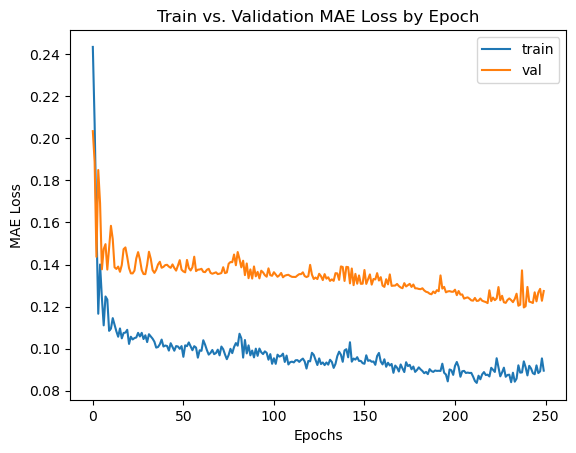

In [429]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Train vs. Validation MAE Loss by Epoch')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

In [430]:
# Predict on Train and Test data
LSTM_train_pred = model.predict(LSTM_X_train).flatten()
LSTM_val_pred = model.predict(LSTM_X_val).flatten()
LSTM_test_pred = model.predict(LSTM_X_test).flatten()

1/1 [==============================] - 0s 14ms/step


In [431]:
# Convert into pred and observed dataframe for graphing
LSTM_train_results_df = pd.DataFrame(data={'Predictions': LSTM_train_pred, 'Observed': LSTM_y_train})
LSTM_val_results_df = pd.DataFrame(data={'Predictions': LSTM_val_pred, 'Observed': LSTM_y_val})
LSTM_test_results_df = pd.DataFrame(data={'Predictions': LSTM_test_pred, 'Observed': LSTM_y_test})

In [432]:
# Calculate RMSE on Train and test data:
LSTM_rmse_train = np.sqrt(mean_squared_error(LSTM_train_results_df['Predictions'], LSTM_train_results_df['Observed']))
LSTM_rmse_val = np.sqrt(mean_squared_error(LSTM_val_results_df['Predictions'], LSTM_val_results_df['Observed']))
LSTM_rmse_test = np.sqrt(mean_squared_error(LSTM_test_results_df['Predictions'], LSTM_test_results_df['Observed']))

print('Train RMSE: %.3f' % LSTM_rmse_train)
print('Val RMSE: %.3f' % LSTM_rmse_val)
print('Test RMSE: %.3f' % LSTM_rmse_test)

Train RMSE: 0.139
Val RMSE: 0.204
Test RMSE: 0.244


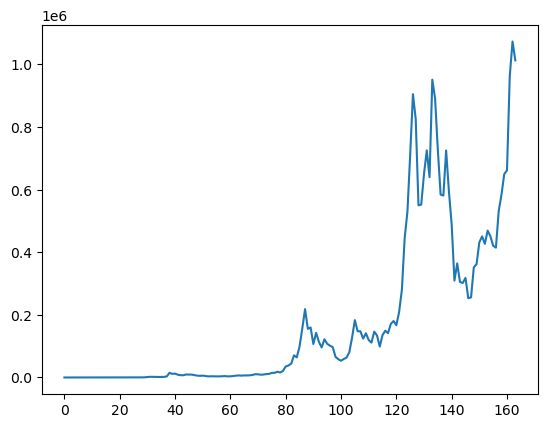

In [433]:
test = scaler.inverse_transform(LSTM_X_prime)
plt.plot(np.exp(np.cumsum(test[:,12])))

In [434]:
def original_transform(source_df, train_df, val_df, test_df, scaler, index, window=5):
    # create the first 5 y values df to prepend to final df
    first_win_df = pd.DataFrame(source_df[:window,12]).set_index(index[:window])
    first_win_df['Predictions'] = first_win_df[0]
    first_win_df.rename(columns={0:'Observed'}, inplace=True)
    
    # Concatenate all Dfs
    results_df = pd.concat([first_win_df, train_df, val_df, test_df], axis=0).set_index(index)
    
    # Scale Original and Predicted data
    reversed_df = pd.DataFrame(np.exp(np.cumsum(scaler.inverse_transform(source_df)[window:,12]))).set_index(index[window:]).rename(columns={0: 'Observed'})
    temp_df = source_df
    temp_df[:,12] = results_df['Predictions']
    reversed_df['Predictions'] = pd.DataFrame(np.exp(np.cumsum(scaler.inverse_transform(temp_df)[window:,12]))).set_index(index[window:])
    
    # restore source df
    
    return reversed_df
    

In [435]:
reversed_df = original_transform(LSTM_X_prime, LSTM_train_results_df, LSTM_val_results_df, LSTM_test_results_df, scaler, X_prime.index, window=Window)

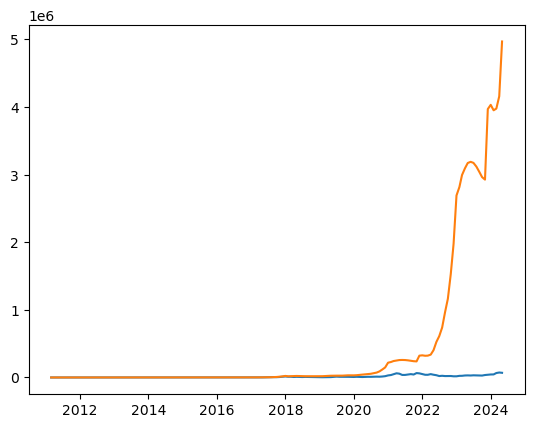

In [436]:
plt.plot(reversed_df)

In [301]:
first_5_df = pd.DataFrame(LSTM_X_prime[:Window,12]).set_index(X_prime.index[:Window])
first_5_df['Predictions'] = first_5_df[0]
first_5_df.rename(columns={0:'Observed'}, inplace=True)

In [302]:
first_5_df

,Observed,Predictions
date,,
2010-09-30,0.216511,0.216511
2010-10-31,0.760947,0.760947
2010-11-30,0.418982,0.418982
2010-12-31,0.270089,0.270089
2011-01-31,0.776262,0.776262


In [303]:
LSTM_results = pd.concat([first_5_df, LSTM_train_results_df, LSTM_val_results_df, LSTM_test_results_df], axis=0).set_index(X_prime.index)

In [313]:
LSTM_Obs_Orig = pd.DataFrame(np.exp(np.cumsum(scaler.inverse_transform(LSTM_X_prime)[Window:,12]))).set_index(X_prime.index[Window:]).rename(columns={0: 'Observed'})
LSTM_temp_X_prime = LSTM_X_prime
LSTM_temp_X_prime[:,12] = LSTM_results['Predictions']

In [314]:
LSTM_Obs_Orig['Predictions'] = pd.DataFrame(np.exp(np.cumsum(scaler.inverse_transform(LSTM_temp_X_prime)[Window:,12]))).set_index(X_prime.index[Window:])

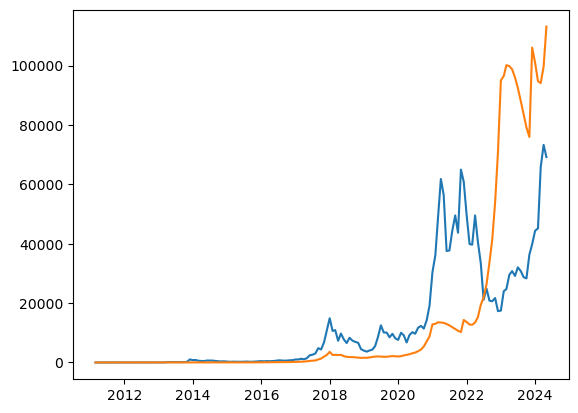

In [378]:
plt.plot(LSTM_Obs_Orig)

In [ ]:
plt.plot(np.exp(np.cumsum(LSTM_results['Observed'])), label='Observed')
plt.plot(np.exp(np.cumsum(LSTM_results['Predictions'])), label='Predicted')
plt.title('Predicted Values vs. Observed Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
original_transform(LSTM_results['Predictions'].to_numpy(), )

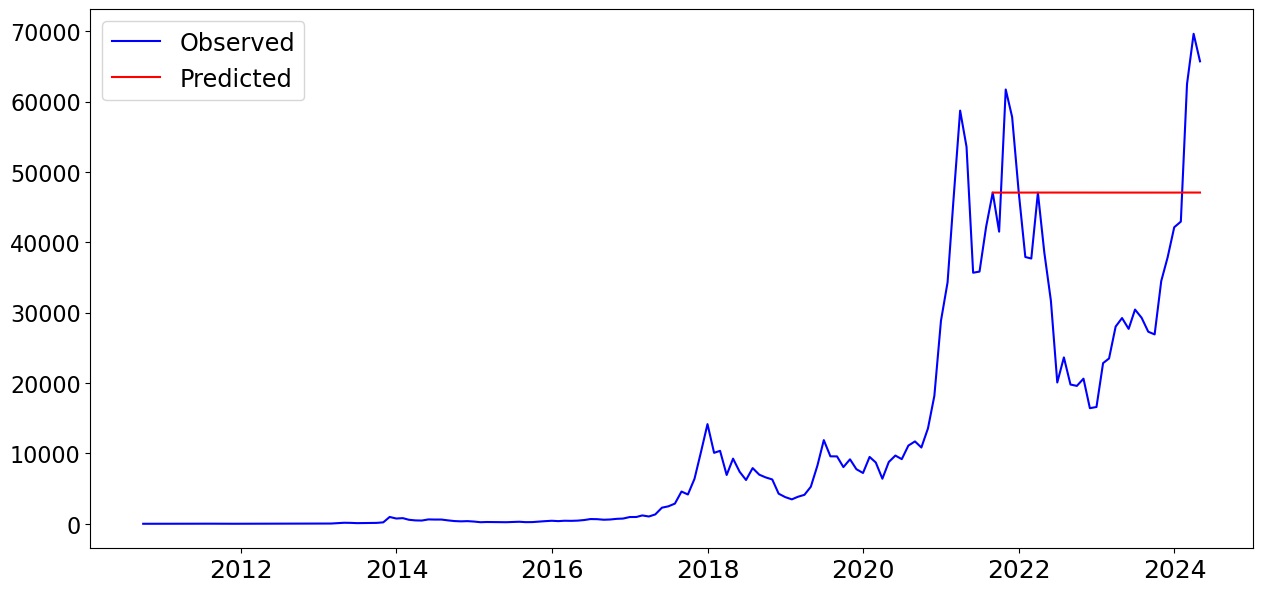

In [58]:
plt.figure(figsize=(15,7))
plt.plot(monthly_pca_bitcoin_df.index, monthly_pca_bitcoin_df['Market Price'], label='Observed', color='b')
plt.plot(LSTM_test_df.index, np.exp(np.cumsum(LSTM_inv_test_pred)) +  monthly_pca_bitcoin_df['Market Price'].iloc[-len(LSTM_inv_test_pred)], color='r', label='Predicted')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

The predictions are still exponential when converted to the orignal scale and tantamount to a straight line when this model should really be more accurately following variance of the bitcoin price especially with an RMSE of .19. So for now, let's tune this LSTM model to see if we can't get best possible result from it. using RMSE as a metric.

In [59]:
def LSTM_model_gen(X_train, num_layers, num_nodes, dropout, loss, optimizer):
    '''
    Generates a list of models to be iterated
    '''
    params = {'num_layers': None, 'num_nodes': None, 'dropout': None, 'loss': None, 'optimizer': None}
    models_dict = {}
    # Generate list of models and dictionary of parameters
    for func in loss:
        for optim in optimizer:
            for i in num_layers:
                for j in num_nodes:
                    for drop in dropout:
                        model = Sequential()
                        if i == 1:
                            model.add(LSTM(j, input_shape=(X_train.shape[1], X_train.shape[2])))
                            model.add(Dropout(drop))
                            model.add(Dense(1))
                            model.compile(loss=func, optimizer=optim)
                            params_list = [i, j, drop, func, optim]
                            keys_list = params.keys()
                            params = dict(zip(keys_list, params_list))
                            models_dict[f'Model{len(models_dict) + 1}'] = (model, params)
                        else:
                            model.add(LSTM(j, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
                            for num in range(i-1):
                                model.add(LSTM(j, return_sequences=True))
                            model.add(Dropout(drop))
                            model.add(Dense(1))
                            model.compile(loss=func, optimizer=optim)
                            params_list = [i, j, drop, func, optim]
                            keys_list = params.keys()
                            params = dict(zip(keys_list, params_list))
                            models_dict[f'Model {len(models_dict) + 1}'] = (model, params)

    return models_dict

def viz_model(history, key, models_dict, inv_y_test, inv_test_pred):
    _, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(25, 7))
    # Plot training and Validation scores by Epoch
    ax1.plot(history.history['loss'], label='train')
    ax1.plot(history.history['val_loss'], label='test')
    ax1.set_title(f'Train vs. Validation {list(models_dict[key][1].keys())[3].upper()} Loss by Epoch')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel(f'{list(models_dict[key][1].keys())[3].upper()} Loss')
    ax1.legend()

    # Rough Plot of Predicted against True Values Stationary Transformation
    t = np.arange(0,33,1)
    ax2.plot(t, inv_y_test, label='observed', color='b')
    ax2.plot(t, inv_test_pred, label='predicted', color='r')
    ax2.set_title('Predicted Values vs. Observed Values')
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Values')
    ax2.legend()

    # Plot of original Value data against Predicted (Transformed) Data
    ax3.plot(monthly_pca_bitcoin_df.index, monthly_pca_bitcoin_df['Market Price'], label='Observed', color='b')
    ax3.plot(LSTM_test_df.index, np.exp(np.cumsum(inv_test_pred)) +  monthly_pca_bitcoin_df['Market Price'].iloc[-len(inv_test_pred)], color='r', label='Predicted')
    ax3.set_title('Predicted Values vs. Observed Values Original Scale')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Values in $s')
    ax3.legend()
                
    plt.suptitle(f'{key} Performance Visualization')
    plt.show()

def model_metrics(key, models_dict, rmse_train, rmse_test):
    # Print Model Params and RMSE metrics before Plotting
    print('#######################')
    print(f'{key} Parameters:')
    for key2 in models_dict[key][1].keys():
        print(f'\t{key2}: {models_dict[key][1][key2]}')
    print('#######################')
    print('Train RMSE: %.3f' % rmse_train)
    print('Test RMSE: %.3f' % rmse_test)
    print('#######################\n')
                        

def LSTM_tuner( X_train, y_train, X_test, y_test, num_epochs, batch_size, num_layers, num_nodes, dropout, loss, optimizer, scaler, callback):
    '''
    Takes in previously formated X, and y tensors for LSTM modeling and tunes model parameters and model layers
    in order to find the best model for the dataset.
    '''
    # Instantiate Models
    best_model = {'Model #': None, 'Model': None, 'History': None, 'Params': None, 'MAE': None, 'RMSE trainset score': None, 'RMSE testset score': None}
    print("Initializing Models Dictionary....")
    models_dict = LSTM_model_gen(X_train=X_train,
                                    num_layers=num_layers,
                                    num_nodes=num_nodes,
                                    dropout=dropout,
                                    loss=loss,
                                    optimizer=optimizer)
    
    print(f"Complete:    Num Models: {len(models_dict)}")
    print("########################\n")
    print('Training Models....')
    # Train Model
    for i in num_epochs:
        for k in batch_size:
            for key in models_dict.keys():
                print(f'\tTraining {key}....')
                history = models_dict[key][0].fit(X_train,
                            y_train,
                            callbacks=[callback],
                            epochs=i,
                            batch_size=k,
                            validation_data=(X_test, y_test),
                            verbose=0,
                            shuffle=False)
                
                # Predict on Train and Test data
                print(f'Evaluating {key}....')
                train_pred = models_dict[key][0].predict(X_train)
                test_pred = models_dict[key][0].predict(X_test)

                # convert from 3 dimensions to 2 dimensions X_train and Predictions
                train_pred_dim1, train_pred_dim2 = train_pred.shape[0], train_pred.shape[-1]
                test_pred_dim1, test_pred_dim2 = test_pred.shape[0], test_pred.shape[-1]
                
                new_X_train = X_train.reshape((X_train.shape[0], X_train.shape[2]))
                new_X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
                new_train_pred = train_pred.flatten().reshape(train_pred_dim1, train_pred_dim2)
                new_test_pred = test_pred.flatten().reshape(test_pred_dim1, test_pred_dim2)

                # Create inverted sets
                inv_train_pred = np.concatenate((new_X_train, new_train_pred), axis=1)
                inv_test_pred = np.concatenate((new_X_test, new_test_pred), axis=1)

                # Transform to original scale
                inv_train_pred = scaler.inverse_transform(inv_train_pred)
                inv_test_pred = scaler.inverse_transform(inv_test_pred)

                # Predicted values on training data
                inv_train_pred = inv_train_pred[:,-1] 
    
                # Predicted values on testing data
                inv_test_pred = inv_test_pred[:,-1] 

                # Scale back original train and test labels:
                #   Train set:
                new_y_train = y_train.reshape((len(y_train), 1))
                inv_y_train = np.concatenate((new_X_train, new_y_train), axis=1)
                inv_y_train = scaler.inverse_transform(inv_y_train)
                inv_y_train = inv_y_train[:,-1]

                #   Test set:
                new_y_test = y_test.reshape((len(y_test), 1))
                inv_y_test = np.concatenate((new_X_test, new_y_test), axis=1)
                inv_y_test = scaler.inverse_transform(inv_y_test)
                inv_y_test = inv_y_test[:,-1]

                # Calculate RMSE on Train and test data:
                rmse_train = np.sqrt(mean_squared_error(inv_y_train, inv_train_pred))
                rmse_test = np.sqrt(mean_squared_error(inv_y_test, inv_test_pred))

                # Reshape data for plotting
                inv_y_test = inv_y_test.reshape(-1,1)
                
                params = [key, models_dict[key][0], history, models_dict[key][1], min(history.history['val_loss']), rmse_train, rmse_test]
                if best_model['Model'] == None:
                    keys_list = best_model.keys()
                    best_model = dict(zip(keys_list, params))
                    print('Best Model updated')
                    print(f'{key}:  {best_model}')
                    print('Graphing...')
                    viz_model(history, key, models_dict, inv_y_test, inv_test_pred)
                    model_metrics(key, models_dict, rmse_train, rmse_test)
                elif min(history.history['val_loss']) < best_model['MAE']:
                    keys_list = best_model.keys()
                    best_model = dict(zip(keys_list, params))
                    print('Best Model updated')
                    print(f'{key}:  {best_model}')
                    print('Graphing...')
                    viz_model(history, key, models_dict, inv_y_test, inv_test_pred)
                    model_metrics(key, models_dict, rmse_train, rmse_test)

    print('...finished\n')
    print(f'Best Model:')
    print('###################')
    for keys in best_model.keys():
        print(f'\t{keys}:   {best_model[keys]}')
    print('###################')
    return best_model


Initializing Models Dictionary....
Complete:    Num Models: 255
########################

Training Models....
	Training Model1....
Evaluating Model1....
2/2 [==============================] - 0s 1000us/step
Best Model updated
Model1:  {'Model #': 'Model1', 'Model': <keras.engine.sequential.Sequential object at 0x000001C2D9ECCBE0>, 'History': <keras.callbacks.History object at 0x000001C2DAE5A3B0>, 'Params': {'num_layers': 1, 'num_nodes': 100, 'dropout': 0.1, 'loss': 'mae', 'optimizer': 'adam'}, 'MAE': 0.06716928631067276, 'RMSE trainset score': 0.3407358931722138, 'RMSE testset score': 0.2028938638877298}
Graphing...


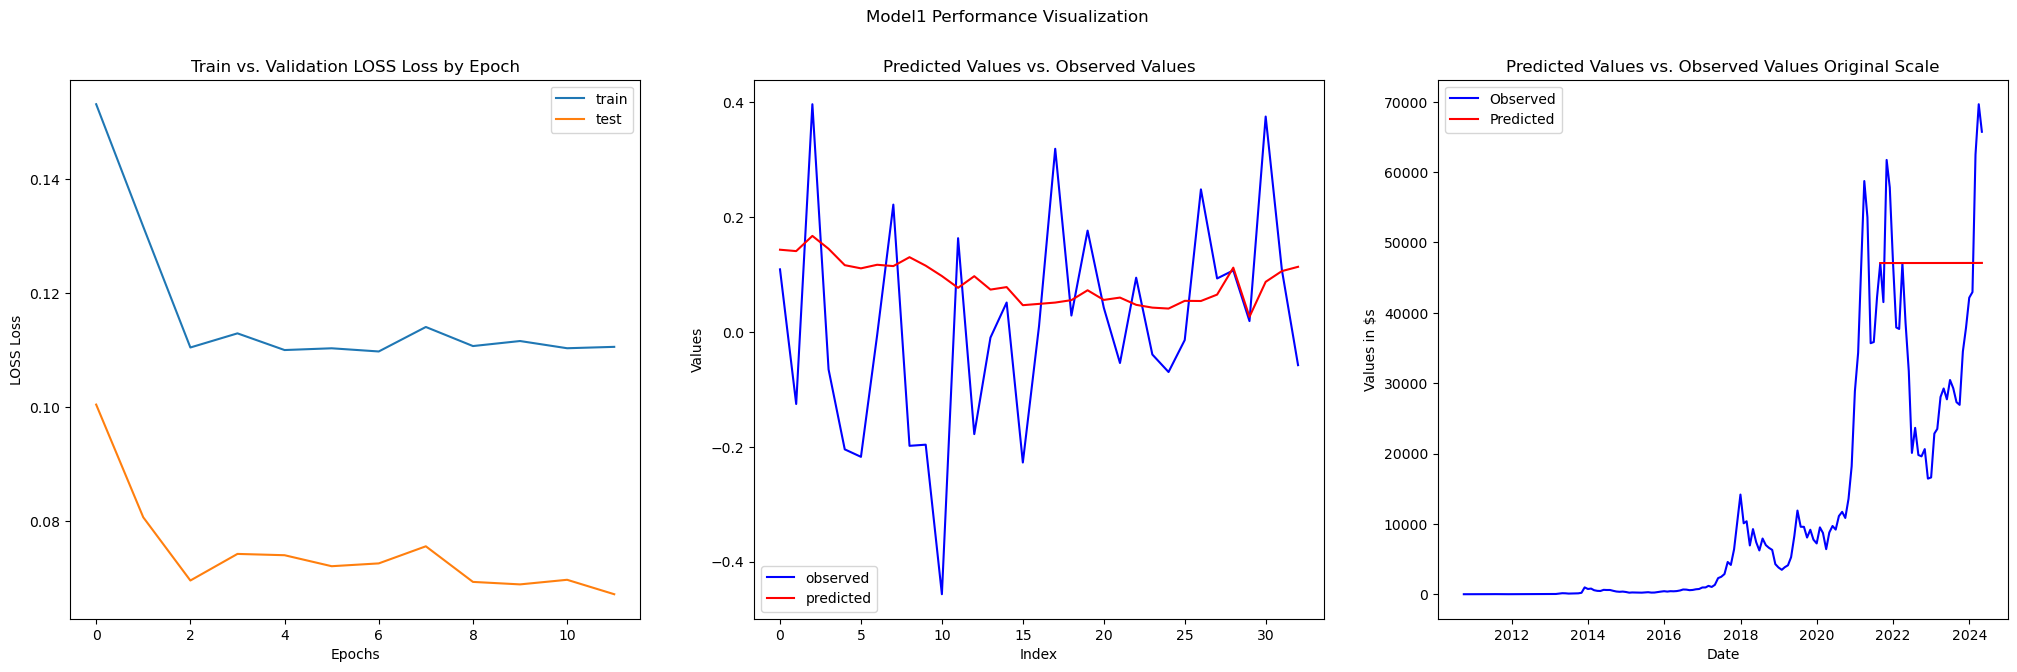

#######################
Model1 Parameters:
	num_layers: 1
	num_nodes: 100
	dropout: 0.1
	loss: mae
	optimizer: adam
#######################
Train RMSE: 0.341
Test RMSE: 0.203
#######################

	Training Model2....
Evaluating Model2....
2/2 [==============================] - 0s 1ms/step
	Training Model3....
Evaluating Model3....
2/2 [==============================] - 0s 1ms/step
	Training Model4....
Evaluating Model4....
2/2 [==============================] - 0s 1ms/step
Best Model updated
Model4:  {'Model #': 'Model4', 'Model': <keras.engine.sequential.Sequential object at 0x000001C2D93E3B80>, 'History': <keras.callbacks.History object at 0x000001C2BA0CE9B0>, 'Params': {'num_layers': 1, 'num_nodes': 100, 'dropout': 0.25000000000000006, 'loss': 'mae', 'optimizer': 'adam'}, 'MAE': 0.06707477569580078, 'RMSE trainset score': 0.3383171780215763, 'RMSE testset score': 0.20123743162934285}
Graphing...


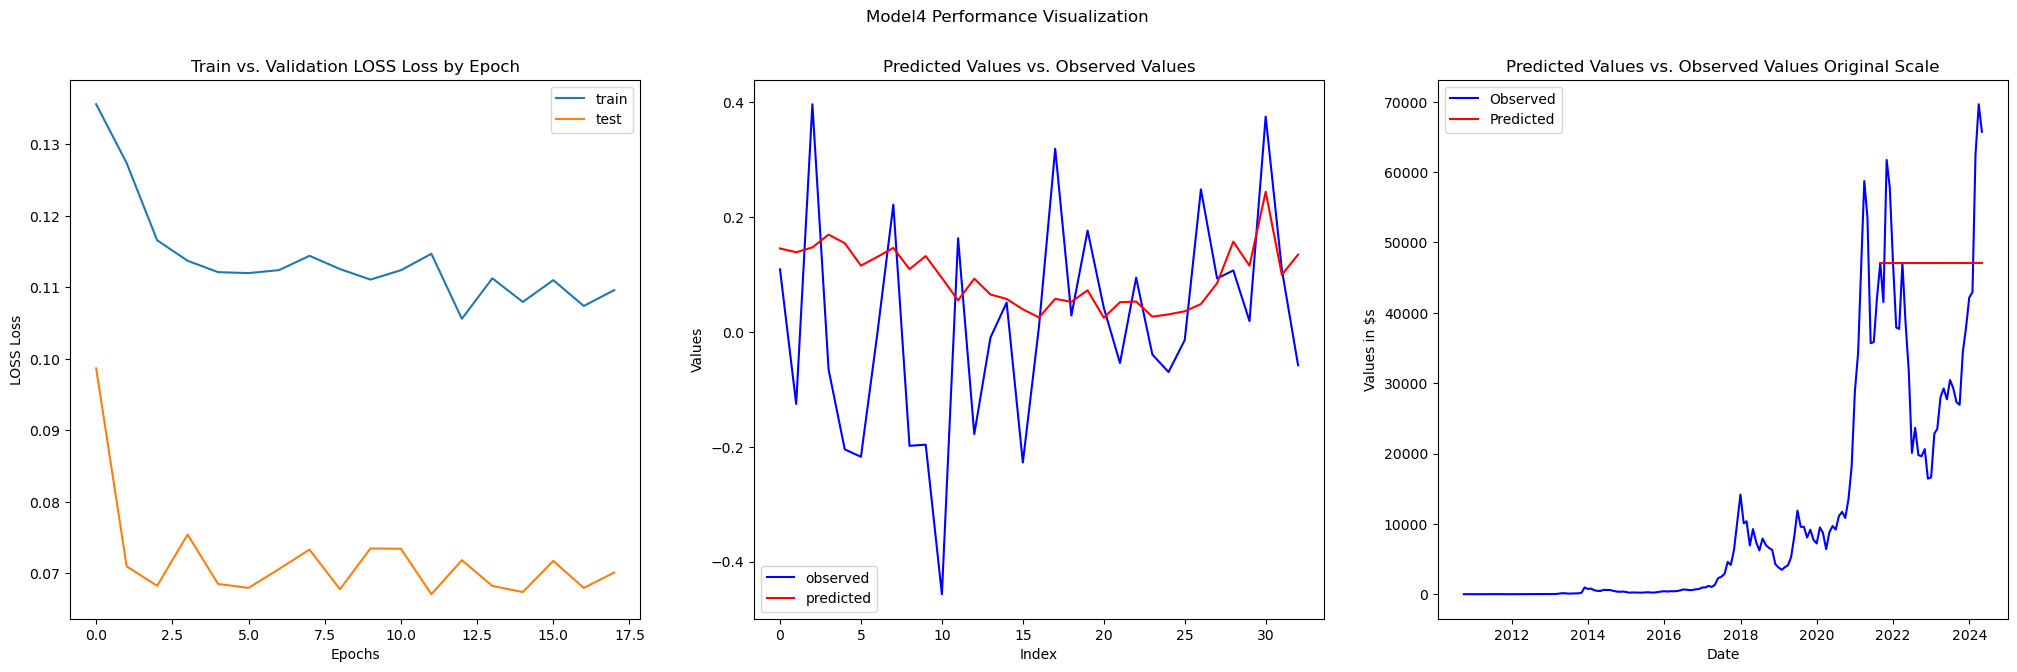

#######################
Model4 Parameters:
	num_layers: 1
	num_nodes: 100
	dropout: 0.25000000000000006
	loss: mae
	optimizer: adam
#######################
Train RMSE: 0.338
Test RMSE: 0.201
#######################

	Training Model5....
Evaluating Model5....
2/2 [==============================] - 0s 2ms/step
	Training Model6....
Evaluating Model6....
2/2 [==============================] - 0s 1ms/step
Best Model updated
Model6:  {'Model #': 'Model6', 'Model': <keras.engine.sequential.Sequential object at 0x000001C2DA127CD0>, 'History': <keras.callbacks.History object at 0x000001C2C0DC13F0>, 'Params': {'num_layers': 1, 'num_nodes': 125, 'dropout': 0.1, 'loss': 'mae', 'optimizer': 'adam'}, 'MAE': 0.06706862896680832, 'RMSE trainset score': 0.33617301356557044, 'RMSE testset score': 0.19728299945397787}
Graphing...


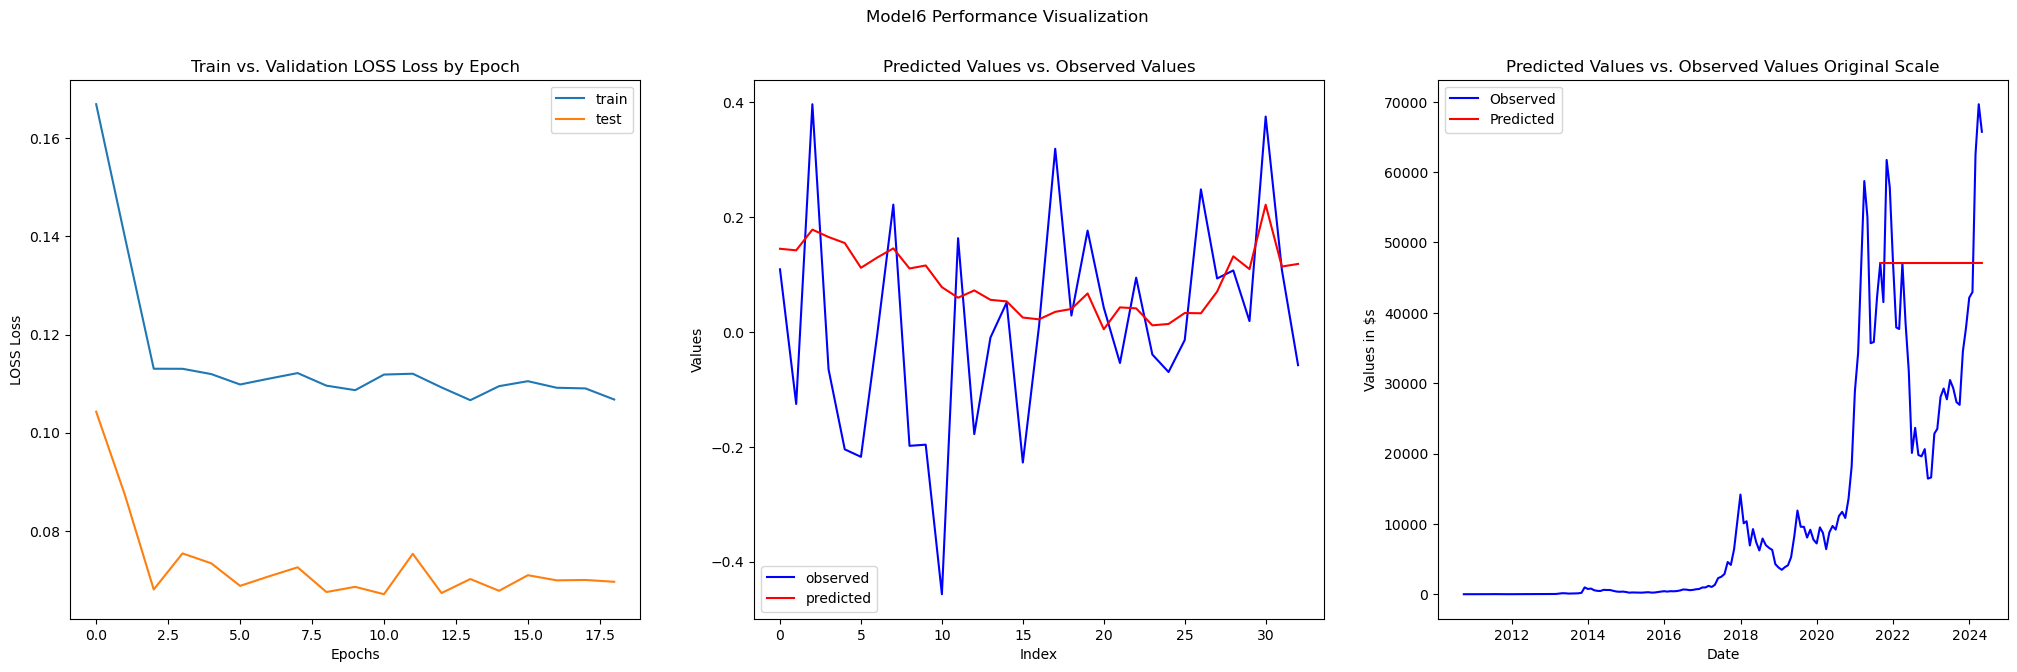

#######################
Model6 Parameters:
	num_layers: 1
	num_nodes: 125
	dropout: 0.1
	loss: mae
	optimizer: adam
#######################
Train RMSE: 0.336
Test RMSE: 0.197
#######################

	Training Model7....
Evaluating Model7....
2/2 [==============================] - 0s 1000us/step
	Training Model8....
Evaluating Model8....
2/2 [==============================] - 0s 1ms/step
	Training Model9....
Evaluating Model9....
2/2 [==============================] - 0s 1ms/step
	Training Model10....
Evaluating Model10....
2/2 [==============================] - 0s 1000us/step
Best Model updated
Model10:  {'Model #': 'Model10', 'Model': <keras.engine.sequential.Sequential object at 0x000001C2DDDC7D60>, 'History': <keras.callbacks.History object at 0x000001C34A81EFE0>, 'Params': {'num_layers': 1, 'num_nodes': 125, 'dropout': 0.30000000000000004, 'loss': 'mae', 'optimizer': 'adam'}, 'MAE': 0.06621554493904114, 'RMSE trainset score': 0.3411674725511737, 'RMSE testset score': 0.18678439570

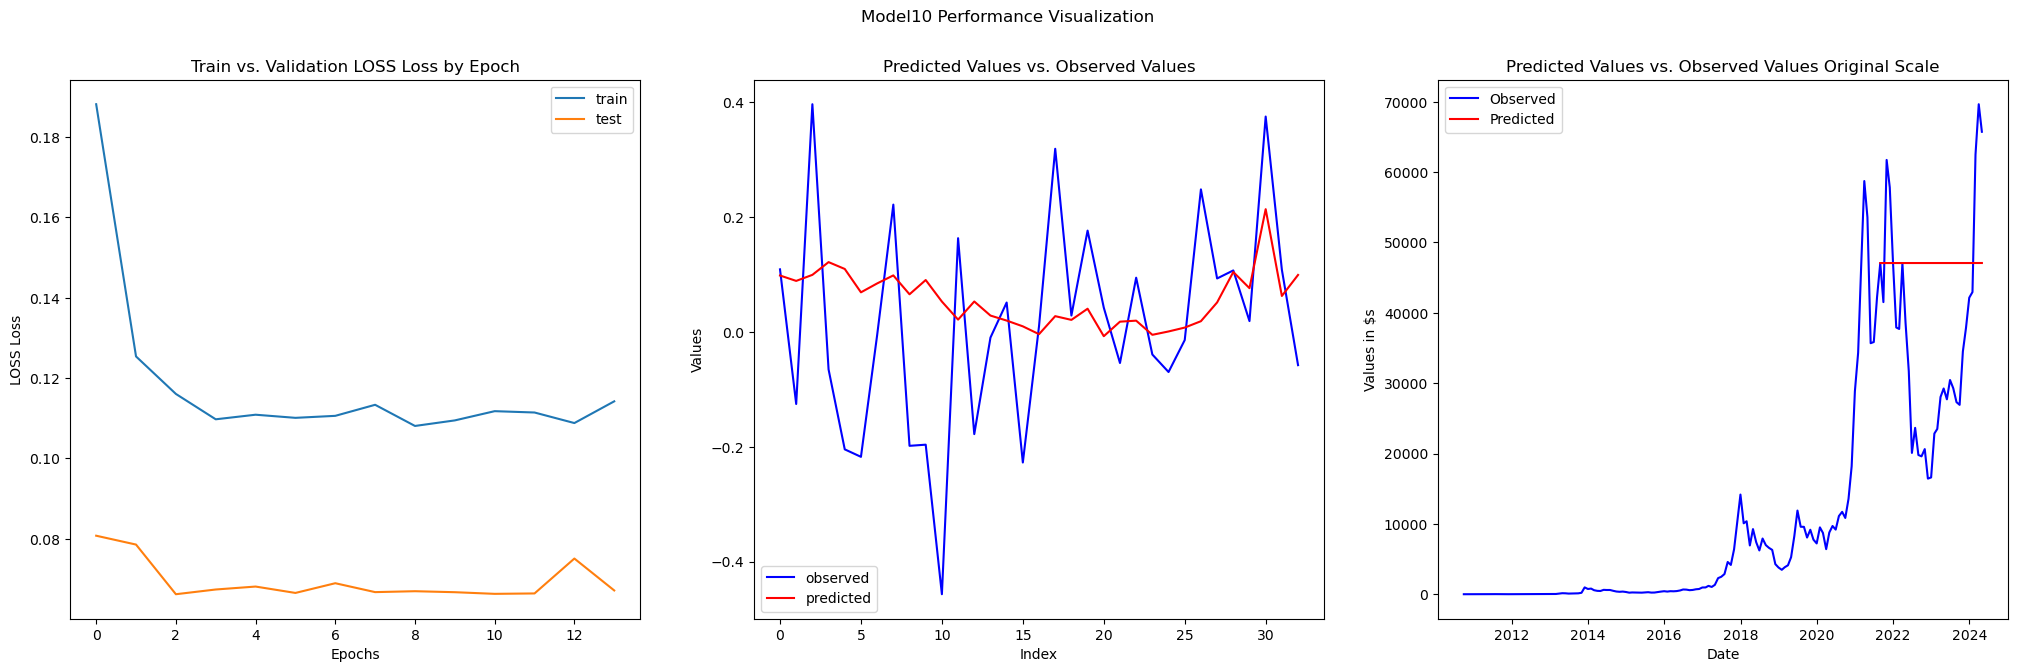

#######################
Model10 Parameters:
	num_layers: 1
	num_nodes: 125
	dropout: 0.30000000000000004
	loss: mae
	optimizer: adam
#######################
Train RMSE: 0.341
Test RMSE: 0.187
#######################

	Training Model11....
Evaluating Model11....
2/2 [==============================] - 0s 2ms/step
	Training Model12....
Evaluating Model12....
2/2 [==============================] - 0s 1000us/step
	Training Model13....
Evaluating Model13....
2/2 [==============================] - 0s 1ms/step
	Training Model14....
Evaluating Model14....
2/2 [==============================] - 0s 2ms/step
	Training Model15....
Evaluating Model15....
2/2 [==============================] - 0s 1000us/step
	Training Model16....
Evaluating Model16....
2/2 [==============================] - 0s 1ms/step
	Training Model17....
Evaluating Model17....
2/2 [==============================] - 0s 2ms/step
	Training Model18....
Evaluating Model18....
2/2 [==============================] - 0s 1000us/step
	Train

In [60]:
num_epochs = np.arange(25, 125, 25)
batch_size = np.arange(10, (len(LSTM_X_prime) + 10), 10)
num_layers = [1, 2, 3]
num_nodes = np.arange(100, 525, 25)
dropout = np.arange(0.1, 0.35, 0.05)
loss = ['mae']
optimizer = ['adam']
callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, mode='min')

###DEBUG SET###
# num_epochs = [150, 200, 250]
# batch_size = [50, 100, 150]
# num_layers = [1, 2, 3]
# num_nodes = [100, 250, 500]
# dropout = [0.15, 0.2, 0.25]
# loss = ['mae']
# optimizer = ['adam']
# callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, mode='min')

# Divide Data into Train and Test data
LSTM_X_prime = scaler.fit_transform(X_prime)
LSTM_X_train_size = int(len(LSTM_X_prime) * 0.80)
LSTM_X_test_size = len(LSTM_X_prime) - LSTM_X_train_size

LSTM_train, LSTM_test = LSTM_X_prime[0:LSTM_X_train_size, :], LSTM_X_prime[LSTM_X_train_size:len(LSTM_X_prime),:]
LSTM_X_train, LSTM_y_train = LSTM_train[:, :-1], LSTM_train[:, -1]
LSTM_X_test, LSTM_y_test = LSTM_test[:, :-1], LSTM_test[:, -1]

# Convert X data into correct dimension for LSTM Model
LSTM_X_train = LSTM_X_train.reshape((LSTM_X_train.shape[0], 1, LSTM_X_train.shape[1]))
LSTM_X_test = LSTM_X_test.reshape((LSTM_X_test.shape[0], 1, LSTM_X_test.shape[1]))

LSTM_best_model = LSTM_tuner(X_train=LSTM_X_train,
                             y_train=LSTM_y_train,
                             X_test=LSTM_X_test,
                             y_test=LSTM_y_test,
                             num_epochs=num_epochs,
                             batch_size=batch_size,
                             num_layers=num_layers,
                             num_nodes=num_nodes,
                             dropout=dropout,
                             loss=loss,
                             optimizer=optimizer,
                             scaler=scaler,
                             callback=callback)